In [60]:
import pandas as pd
ClinicalTrial = pd.read_csv('/content/Clinicaltrial.csv')
Grant = pd.read_csv('/content/Grant.csv')#,  error_bad_lines=False)
Pubmed = pd.read_csv('/content/Pubmed.csv', on_bad_lines='skip')# on_bad_lines='skip') #error_bad_lines=False
ClinicalTrial = ClinicalTrial.applymap(lambda x: str(x).replace('"', ''))
Grant = Grant.applymap(lambda x: str(x).replace('"', ''))
Pubmed = Pubmed.applymap(lambda x: str(x).replace('"', ''))
print(ClinicalTrial.shape[0],Grant.shape[0],Pubmed.shape[0])

8436 22000 34023


In [ ]:
display('ClinicalTrial:',ClinicalTrial.columns)
display('Grant:',Grant.columns)
display('Pubmed:',Pubmed.columns)

'ClinicalTrial:'

Index(['i.OfficialName', 'i.OfficialAffiliation', 'c. BriefTitle',
       'c.OfficialTitle', 'c.BriefSummary', 'c.NCTId', 'l.LocationCity',
       'l.LocationCountry', 'l.LocationFacility', 'concatenatedInterventions'],
      dtype='object')

'Grant:'

Index(['pi.pi_name', 'pi.org_name', 'p.title', 'p.application_id',
       'p.abstract', 'p.terms', 'co.core_project_num'],
      dtype='object')

'Pubmed:'

Index(['a.fullName', 'ar.title', 'ar.affiliation', 'ar.pubmed_id',
       'ar.abstractText', 'concatenatedKeywords', 'concatenatedMeshterms'],
      dtype='object')

In [ ]:
set(ClinicalTrial['l.LocationCountry'].values)

{'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Egypt',
 'Estonia',
 'France',
 'Germany',
 'Greece',
 'Holy See (Vatican City State)',
 'Hungary',
 'India',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, Republic of',
 'Latvia',
 'Lithuania',
 'Mexico',
 'Moldova, Republic of',
 'Netherlands',
 'New Zealand',
 'North Macedonia',
 'Norway',
 'Pakistan',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Slovakia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'United States'}

In [61]:
ClinicalTrial = ClinicalTrial[ClinicalTrial['i.OfficialName'].apply(lambda x: x.strip()) != ""]
ClinicalTrial = ClinicalTrial.drop_duplicates()
ClinicalTrial.reset_index(drop=True, inplace=True)

Grant = Grant[Grant['pi.pi_name'].apply(lambda x: x.strip()) != ""]
Grant = Grant.drop_duplicates()
Grant.reset_index(drop=True, inplace=True)

Pubmed = Pubmed[Pubmed['a.fullName'].apply(lambda x: x.strip()) != ""]
Pubmed = Pubmed.drop_duplicates()
Pubmed.reset_index(drop=True, inplace=True)
print(ClinicalTrial.shape[0],Grant.shape[0],Pubmed.shape[0])

8422 11343 33707


# US map info

In [62]:
fip_finding=pd.read_csv('/content/uscities.csv')
fip_finding_dict=dict()
lat_finding_dict=dict()
lon_finding_dict=dict()
lon_lag_fip_info=dict()
for i in fip_finding.index:
     fip_finding_dict[fip_finding['city'][i].lower()]= fip_finding['county_fips'][i]
     lat_finding_dict[fip_finding['city'][i].lower()]= fip_finding['lat'][i]
     lon_finding_dict[fip_finding['city'][i].lower()]= fip_finding['lng'][i]
     lon_lag_fip_info[( round(fip_finding['lat'][i]) ,round(fip_finding['lng'][i]) )]=fip_finding['city'][i]

In [63]:
def find_fip(x):
  try:
    return fip_finding_dict[x.lower()]
  except:
    return  'None'
def find_lat(x):
  try:
    return lat_finding_dict[x.lower()]
  except:
    return  'None'
def find_lon(x):
  try:
    return lon_finding_dict[x.lower()]
  except:
    return  'None'

In [64]:
ClinicalTrial=ClinicalTrial[ClinicalTrial['l.LocationCountry']=='United States']
ClinicalTrial['fip']=ClinicalTrial.apply(lambda x:  find_fip(x['l.LocationCity'])  ,axis=1 )
ClinicalTrial['lat']=ClinicalTrial.apply(lambda x:  find_lat(x['l.LocationCity'])  ,axis=1 )
ClinicalTrial['lng']=ClinicalTrial.apply(lambda x:  find_lon(x['l.LocationCity'])  ,axis=1 )
ClinicalTrial=ClinicalTrial[ClinicalTrial['fip']!='None']
ClinicalTrial['fip'] = ClinicalTrial['fip'].apply(lambda x: '{0:0>5}'.format(x))

<ipython-input-64-8ea805f48ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClinicalTrial['fip']=ClinicalTrial.apply(lambda x:  find_fip(x['l.LocationCity'])  ,axis=1 )
<ipython-input-64-8ea805f48ea0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClinicalTrial['fip'] = ClinicalTrial['fip'].apply(lambda x: '{0:0>5}'.format(x))


In [65]:
!pip install locationtagger
import nltk
import spacy
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')
!python -m spacy download en_core_web_sm
import locationtagger

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=55d65fbec2ad2ad34e3303bd2eb6450f00961eed0fde9065600a9b89337af8cc
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
sample_text="India has very rich and vivid culture widely\
        spread from Kerala to Nagaland to Haryana to Maharashtra. " \
       "Mumbai being financial capital can be said better\
       than some western cities such as " \
       " Lahore, Canberra etc. Pakistan and Nepal share its borders"
#sample_text = 'AGILE SCIENCES, INC.'
place_entity = locationtagger.find_locations(text = sample_text)
print("The countries in text : ",place_entity.countries)
print("The states in text : ",place_entity.regions)
print("The cities in text : ",place_entity.cities)
print("The countries regions in text : ",place_entity.country_regions)
print("The countries cities in text : ",place_entity.country_cities)
print("All other countries in text : ",place_entity.other_countries)
print("The region cities in text : ",place_entity.region_cities)
print("All other regions in text : ",place_entity.other_regions)
print("All other entities in text : ",place_entity.other)

The countries in text :  ['India', 'Nepal', 'Pakistan']
The states in text :  ['Maharashtra', 'Haryana', 'Kerala', 'Nagaland']
The cities in text :  ['Mumbai', 'Canberra', 'Lahore', 'Haryana']
The countries regions in text :  {'India': ['Maharashtra', 'Haryana', 'Kerala', 'Nagaland']}
The countries cities in text :  {'India': ['Mumbai', 'Haryana'], 'Australia': ['Canberra'], 'Pakistan': ['Lahore']}
All other countries in text :  ['India', 'Australia', 'Pakistan']
The region cities in text :  {'Maharashtra': ['Mumbai'], 'Australian Capital Territory': ['Canberra'], 'Punjab': ['Lahore'], 'Haryana': ['Haryana']}
All other regions in text :  ['Maharashtra', 'Australian Capital Territory', 'Punjab', 'Haryana']
All other entities in text :  []


In [ ]:
affiliation_pubmed=list(set(Pubmed['ar.affiliation'].values))
len(affiliation_pubmed)

4296

In [66]:
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Convert states to lowercase
states_lower = [state.lower() for state in states]
affiliation_pubmed=list(set(Pubmed['ar.affiliation'].values))
affiliation_pubmed=affiliation_pubmed#[:100]

states_lower_set = set(state.lower() for state in states)
Pubmed_city = {}
# Limiting to the first 100 affiliations
for j in affiliation_pubmed:
    if not j:
        continue  # Skip empty affiliations

    place_entity = locationtagger.find_locations(text=j)

    if place_entity.countries and place_entity.countries[0] != 'United States':
        continue  # Skip non-US affiliations

    if place_entity.countries or (place_entity.regions and place_entity.regions[0].lower() in states_lower_set):
        # If country is specified as US or region matches a state, proceed
        for i in reversed(place_entity.cities):
            city_lower = i.lower()
            if city_lower in fip_finding_dict and city_lower not in ['hospital', 'university']:
                #if place_entity.regions and place_entity.region_cities:
                Pubmed_city[j] = city_lower
                break

In [67]:
def get_city(x):
  try:
    return Pubmed_city[x]
  except:
    return

Pubmed['l.LocationCity']=Pubmed.apply(lambda x:  get_city(x['ar.affiliation'])  ,axis=1 )

Pubmed['fip']=Pubmed.apply(lambda x:  find_fip(x['l.LocationCity'])  ,axis=1 )
Pubmed['lat']=Pubmed.apply(lambda x:  find_lat(x['l.LocationCity'])  ,axis=1 )
Pubmed['lng']=Pubmed.apply(lambda x:  find_lon(x['l.LocationCity'])  ,axis=1 )
Pubmed=Pubmed[Pubmed['fip']!='None']
Pubmed['fip'] = Pubmed['fip'].apply(lambda x: '{0:0>5}'.format(x))

<ipython-input-67-97944fc204dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pubmed['fip'] = Pubmed['fip'].apply(lambda x: '{0:0>5}'.format(x))


In [ ]:
len(set(Grant['pi.org_name'].values))

558

In [68]:
from geopy.geocoders import Nominatim

# Increase timeout for Nominatim requests
geolocator = Nominatim(user_agent="GetLoc", timeout=1)  # You can adjust the timeout value as needed
geolocator.geocode('harvard')

Location(Harvard University, Mercer Circle, Old Cambridge, Cambridge, Middlesex County, Massachusetts, 02163, United States, (42.365743249999994, -71.12221394207614, 0.0))

In [69]:
from geopy.geocoders import Nominatim

# Increase timeout for Nominatim requests
geolocator = Nominatim(user_agent="GetLoc", timeout=30)  # You can adjust the timeout value as needed

Grant_city=dict()
organization_grant=list(set(Grant['pi.org_name'].values))
organization_grant=organization_grant
for location in organization_grant:
  if location !='':
    try:
        getLoc = geolocator.geocode(location)
        if getLoc:
            Grant_city[location]= lon_lag_fip_info.get((round(getLoc.latitude), round(getLoc.longitude)))
            '''
            if location not in Grant_city:
                        print(location)
                        address=getLoc.address
                        place_entity = locationtagger.find_locations(text=address)
                        for i in reversed(place_entity.cities):
                               if i in place_entity.region_cities[place_entity.regions[0].lower()]:
                                  city_lower = i.lower()
                                  if city_lower in fip_finding_dict and city_lower not in ['hospital', 'university']:
                                      Grant_city[j] = city_lower
                                      break
            '''
    except Exception :
      pass

In [70]:
organization_grant=list(set(Grant['pi.org_name'].values))
organization_grant=organization_grant#[:100]
#Grant_city = {}
# Limiting to the first 100 affiliations
for j in organization_grant:
    if not j or j in Grant_city:
        continue  # Skip empty affiliations

    place_entity = locationtagger.find_locations(text=j)

    if place_entity.countries and place_entity.countries[0] != 'United States':
        continue  # Skip non-US affiliations

    if place_entity.countries or (place_entity.regions and place_entity.regions[0].lower() in states_lower_set):
        # If country is specified as US or region matches a state, proceed
        for i in reversed(place_entity.cities):
            city_lower = i.lower()
            if city_lower in fip_finding_dict and city_lower not in ['hospital', 'university']:
                #if place_entity.regions and place_entity.region_cities:
                Grant_city[j] = city_lower
                break

In [71]:
def get_city(x):
  try:
    return Grant_city[x]
  except:
    return
Grant['l.LocationCity']=Grant.apply(lambda x:  get_city(x['pi.org_name'])  ,axis=1 )

Grant['fip']=Grant.apply(lambda x:  find_fip(x['l.LocationCity'])  ,axis=1 )
Grant['lat']=Grant.apply(lambda x:  find_lat(x['l.LocationCity'])  ,axis=1 )
Grant['lng']=Grant.apply(lambda x:  find_lon(x['l.LocationCity'])  ,axis=1 )
Grant=Grant[Grant['fip']!='None']
Grant['fip'] = Grant['fip'].apply(lambda x: '{0:0>5}'.format(x))

<ipython-input-71-cdb01d25457e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Grant['fip'] = Grant['fip'].apply(lambda x: '{0:0>5}'.format(x))


In [ ]:
Grant

pi.pi_name                               pi.org_name  \
1              PALMER, LISA           CASE WESTERN RESERVE UNIVERSITY   
2       LEWIS, STEPHEN JOHN           CASE WESTERN RESERVE UNIVERSITY   
3          GASTON, BENJAMIN           CASE WESTERN RESERVE UNIVERSITY   
4        WALSH, MARTIN JOHN   ICAHN SCHOOL OF MEDICINE AT MOUNT SINAI   
6           LAL, RATNESHWAR        UNIVERSITY OF CALIFORNIA SAN DIEGO   
...                     ...                                       ...   
11338  IGLEWSKI, BARBARA H.                   UNIVERSITY OF ROCHESTER   
11339      GUSELLA, JAMES F            MASSACHUSETTS GENERAL HOSPITAL   
11340   WECHSLER, MICHAEL E              BRIGHAM AND WOMEN'S HOSPITAL   
11341     VAN RIPER, MARCIA  UNIVERSITY OF NORTH CAROLINA CHAPEL HILL   
11342        LOOK, DWIGHT C                        UNIVERSITY OF IOWA   

                                                 p.title p.application_id  \
1      Cellular S-nitrosothiol signaling in respirato...          8577190   
2      Cellular S-nitrosothiol signaling in respirato...          8577190   
3      Cellular S-nitrosothiol signaling in respirato...          8577190   
4                   Chromatin Dynamics of the CFTR locus          8463331   
6      Amyloid ion channels to design therapeutics fo...          8531447   
...                                                  ...              ...   
11338    ROLE OF EXOENZYME S IN P. AERUGINOSA INFECTIONS          3139190   
11339                 MECHANISM OF FAMILIAL DYSAUTONOMIA          6484944   
11340  Polymorphisms of Neural NOS and the Asthma Phe...          6320982   
11341  FAMILY EXPERIENCE OF GENETIC TESTING: ETHICAL ...          6392971   
11342  EPITHELIAL CELL RESPONSE TO H.INFLUENZAE IN TH...          6390902   

                                              p.abstract  \
1      DESCRIPTION (provided by applicant):   Cellula...   
2      DESCRIPTION (provided by applicant):   Cellula...   
3      DESCRIPTION (provided by applicant):   Cellula...   
4      DESCRIPTION (provided by applicant): Since the...   
6      DESCRIPTION (provided by applicant): Protein c...   
...                                                  ...   
11338  Pseudomonas aeruginosa is a major cause of sev...   
11339    DESCRIPTION (Adapted from investigator's abs...   
11340  DESCRIPTION (provided by applicant) Nitric oxi...   
11341                                                ...   
11342    DESCRIPTION (adapted from the application): ...   

                                                 p.terms co.core_project_num  \
1                                                    nan         P01HL101871   
2                                                    nan         P01HL101871   
3                                                    nan         P01HL101871   
4      [Achievement,  Alleles,  Architecture,  base, ...         R01HL103967   
6      [3-Dimensional,  Abrus,  Agonist,  alpha synuc...         R01AG028709   
...                                                  ...                 ...   
11338  [virulence, antibacterial antibody, bacterial ...         R01AI025669   
11339  [gene mutation, molecular pathology, familial ...         R01NS036326   
11340  [patient oriented research, nitric oxide synth...         K23HL004285   
11341  [experience, psychological adaptation, family ...         K01NR000139   
11342  [bacteria infection mechanism, respiratory epi...         R01HL065752   

          l.LocationCity    fip      lat      lng  
1              Bratenahl  39035  41.5538 -81.6055  
2              Bratenahl  39035  41.5538 -81.6055  
3              Bratenahl  39035  41.5538 -81.6055  
4              Teterboro  34003   40.858 -74.0594  
6               Del Dios  06073  33.0757 -117.119  
...                  ...    ...      ...      ...  
11338            Linwood  36051  42.8967 -77.9476  
11339  Monomoscoy Island  25001  41.5712 -70.5026  
11340  Monomoscoy Island  25001  41.5712 -70.5026  
11341        

https://www.geeksforgeeks.org/how-to-get-geolocation-in-python/#

In [ ]:
import certifi
import ssl
import geopy.geocoders
import requests
import urllib.parse
university = 'harvard'
url = 'https://nominatim.openstreetmap.org/search.php?q=' + urllib.parse.quote(university) + '&format=jsonv2'
print(url)
response = requests.get(url).json()
print(response[0]['lat'])
print(response[0]['lon'])

https://nominatim.openstreetmap.org/search.php?q=harvard&format=jsonv2
42.365743249999994
-71.12221394207614


# Finding connection

In [ ]:
def find_coauthors(df,name,affliation,title):
    coauthors_dict = {}
    connection={}
    for index_a, row_a in df.iterrows():
        for index_b, row_b in df.iterrows():
            if index_a != index_b and row_a[title] == row_b[title]:
                key_a =(row_a[name], row_a[affliation])
                key_b = (row_b[name], row_b[affliation])

                if key_a !=key_b  and key_b[0].strip() !=''  and key_a[0].strip() !='':
                  if key_a not in coauthors_dict: coauthors_dict[key_a] = []
                  if key_b not in coauthors_dict: coauthors_dict[key_b] = []

                  if key_b not in coauthors_dict[key_a]:  coauthors_dict[key_a].append(key_b)
                  if key_a not in coauthors_dict[key_b]:  coauthors_dict[key_b].append(key_a)
                  if   (key_a,key_b) not in connection:   connection[(key_a,key_b)]=1
                  else:                                   connection[(key_a,key_b)]+= connection[(key_a,key_b)]


    return coauthors_dict,connection

import time
print("--- start ---")
#start_time = time.time()
#a,a1=find_coauthors(ClinicalTrial,'i.OfficialName','i.OfficialAffiliation','c.NCTId')
#print("--- %s seconds ---" % (time.time() - start_time))

#start_time = time.time()
#b,b1=find_coauthors(Grant,'pi.pi_name','pi.org_name','p.application_id')
#print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c,c1=find_coauthors(Pubmed,'a.fullName','ar.affiliation','ar.pubmed_id')
print("--- %s seconds ---" % (time.time() - start_time))


--- start ---


In [72]:
#faster way
def find_coauthors(df, name, affiliation, title):
    coauthors_dict = {}
    connection = {}
    # Group rows by title
    grouped = df.groupby(title)
    for title_value, group in grouped:
        author_affiliation_set = set()

        for _, row in group.iterrows():
            author = (row[name], row[affiliation])

            # Skip if author name or affiliation is empty
            if not all(author):
                continue

            # If the author is not already seen for this title
            if author not in author_affiliation_set:
                author_affiliation_set.add(author)
            else:
                # This author has already been considered for this title
                continue

            # Add author to coauthors_dict if not already present
            if author not in coauthors_dict:
                coauthors_dict[author] = []

            # Find co-authors within the same title group
            coauthors = group[(group[name] != row[name]) & (group[affiliation] != row[affiliation])]
            for _, coauthor_row in coauthors.iterrows():
                coauthor = (coauthor_row[name], coauthor_row[affiliation])

                # Skip if coauthor name or affiliation is empty
                if not all(coauthor):
                    continue

                # Avoid duplicates
                if coauthor not in coauthors_dict[author]:
                    coauthors_dict[author].append(coauthor)

                # Update connection count
                connection[(author, coauthor)] = connection.get((author, coauthor), 0) + 1

    return coauthors_dict, connection
import time
# Example usage
print("--- start ---")
start_time = time.time()
a,a1=find_coauthors(ClinicalTrial,'i.OfficialName','i.OfficialAffiliation','c.NCTId')
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
b,b1=find_coauthors(Grant,'pi.pi_name','pi.org_name','p.application_id')
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
c,c1=find_coauthors(Pubmed,'a.fullName','ar.affiliation','ar.pubmed_id')
print("--- %s seconds ---" % (time.time() - start_time))


--- start ---
--- 0.5898780822753906 seconds ---
--- 6.200312614440918 seconds ---
--- 2.9368526935577393 seconds ---


In [73]:
from collections import defaultdict

# Combine dictionaries
combined_dict = defaultdict(set)

# Function to merge values for common keys
def merge_dicts(d1, d2):
    for key, values in d1.items():
        combined_dict[key].update(values)
    for key, values in d2.items():
        combined_dict[key].update(values)
    return combined_dict

# Merge dictionaries
combined_dict = merge_dicts(a, b)
combined_dict = merge_dicts(combined_dict, c)

def sum_dicts(dict1, dict2):
    result_dict = {}
    all_keys = set(dict1.keys()) | set(dict2.keys())
    for key in all_keys:
        value1 = dict1.get(key, 0)
        value2 = dict2.get(key, 0)
        result_dict[key] = value1 + value2
    return result_dict
# Merge dictionaries
combined_dict1 = sum_dicts(a1, b1)
result_dict1 = sum_dicts(combined_dict1, c1)

# Convert sets back to lists if needed
result_dict = {key: list(values) for key, values in combined_dict.items()}

In [ ]:
combined_dict=a
result_dict = {key: list(values) for key, values in combined_dict.items()}
result_dict1=a1

In [74]:
for key in result_dict1:
    result_dict1[key] = result_dict1[key] %1000

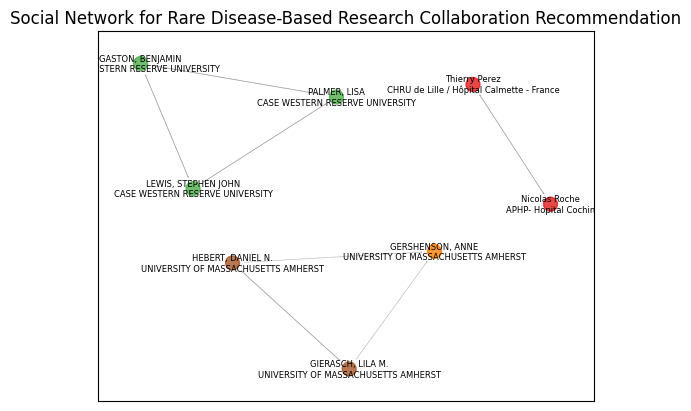

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your provided dictionary
data =  {('Nicolas Roche',
  'APHP- Hopital Cochin'): [('Thierry Perez',
   'CHRU de Lille / Hôpital Calmette - France')],
 ('Thierry Perez',
  'CHRU de Lille / Hôpital Calmette - France'): [('Nicolas Roche',
   'APHP- Hopital Cochin')],
 ('PALMER, LISA',
  'CASE WESTERN RESERVE UNIVERSITY'): [('GASTON, BENJAMIN',
   'CASE WESTERN RESERVE UNIVERSITY'), ('LEWIS, STEPHEN JOHN',
   'CASE WESTERN RESERVE UNIVERSITY')],
 ('LEWIS, STEPHEN JOHN',
  'CASE WESTERN RESERVE UNIVERSITY'): [('PALMER, LISA',
   'CASE WESTERN RESERVE UNIVERSITY'), ('GASTON, BENJAMIN',
   'CASE WESTERN RESERVE UNIVERSITY')],
 ('GASTON, BENJAMIN',
  'CASE WESTERN RESERVE UNIVERSITY'): [('PALMER, LISA',
   'CASE WESTERN RESERVE UNIVERSITY'), ('LEWIS, STEPHEN JOHN',
   'CASE WESTERN RESERVE UNIVERSITY')],
 ('HEBERT, DANIEL N.',
  'UNIVERSITY OF MASSACHUSETTS AMHERST'): [('GIERASCH, LILA M.',
   'UNIVERSITY OF MASSACHUSETTS AMHERST'), ('GERSHENSON, ANNE',
   'UNIVERSITY OF MASSACHUSETTS AMHERST')],
 ('GIERASCH, LILA M.',
  'UNIVERSITY OF MASSACHUSETTS AMHERST'): [('GERSHENSON, ANNE',
   'UNIVERSITY OF MASSACHUSETTS AMHERST'), ('HEBERT, DANIEL N.',
   'UNIVERSITY OF MASSACHUSETTS AMHERST')]}
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Determine connected components
components = list(nx.strongly_connected_components(G))
# Assign colors to nodes based on connected components
color_map = {}
for i, component in enumerate(components):
    for node in component:
        color_map[node] = plt.cm.Set1(i / len(components))  # Set1 colormap for variety

# Draw the graph with enhanced styling
#fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

#pos = nx.spring_layout(G, seed=42, k=1, iterations=1)
pos = nx.kamada_kawai_layout(G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)
# Edge styling
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)
# Label styling
labels = {node: f"{node}\n{G.nodes[node]['institution']}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=6, font_color='black')
# Add a title
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
# Show the plot
plt.show()

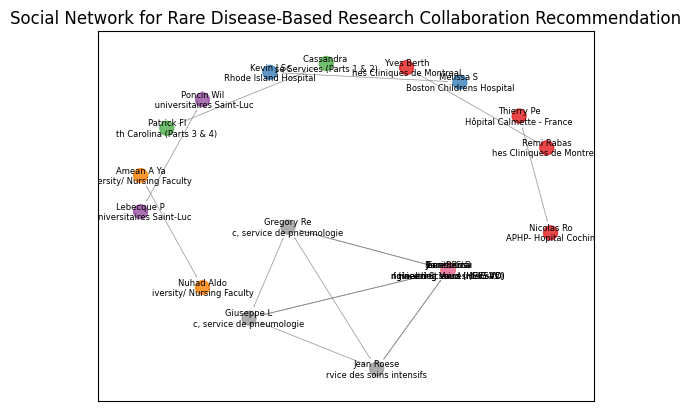

In [ ]:
data= dict(list(combined_dict.items())[:15])
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Determine connected components
components = list(nx.strongly_connected_components(G))
# Assign colors to nodes based on connected components
color_map = {}
for i, component in enumerate(components):
    for node in component:
        color_map[node] = plt.cm.Set1(i / len(components))  # Set1 colormap for variety

# Draw the graph with enhanced styling
#fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

#pos = nx.spring_layout(G, seed=42, k=1, iterations=1)
pos = nx.kamada_kawai_layout(G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)
# Edge styling
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)
# Label styling
labels = {node: f"{node[:10]}\n{G.nodes[node]['institution'][-25:]}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=6, font_color='black')
# Add a title
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
# Show the plot
plt.show()

In [ ]:
import networkx as nx
layout_algorithms = [
    nx.circular_layout,
    nx.random_layout,
    nx.spring_layout,
    nx.spectral_layout,
    nx.shell_layout,
    nx.bipartite_layout,
    nx.planar_layout,
    nx.fruchterman_reingold_layout,
    nx.kamada_kawai_layout
]

In [ ]:
data = {
    ('jdhssk', 'kshsls'): [('jdworiesk', 'ksfdkwjr'), ('jdkwej', 'nbooools of school'), ('jtermsk', 'kswpqke')]
}
# Iterate over the original dictionary
def modified_name(data,n,m):
  modified_data = {}
  for key, values in data.items():
    # Modify the key to include only the first 10 characters of each part
    modified_key = tuple(part[n:m] for part in key)
    # Modify each value to include only the first 10 characters of each part
    modified_values = [(value[0][n:m], value[1][n:m]) for value in values]
    # Update the modified data dictionary
    modified_data[modified_key] = modified_values
  return   modified_data
modified_name(data,0,2)

{('jd', 'ks'): [('jd', 'ks'), ('jd', 'nb'), ('jt', 'ks')]}

In [ ]:
filtered_items = {key: value for key, value in result_dict1.items() if value in [3,4,5]}
components_list = []
for key in filtered_items.keys():
    components_list.extend(key)
#components_list
Small_sample = {key: value for key, value in combined_dict.items() if key in components_list}

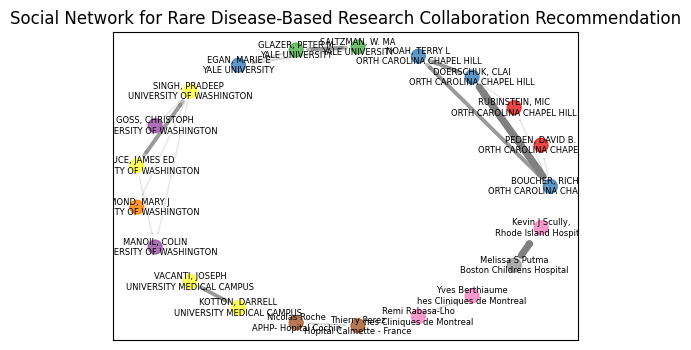

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Small_sample.update(dict(list(combined_dict.items())[:5]))
data=Small_sample
#data= dict(list(combined_dict.items())[0:21])
#data=modified_name(data,0,20)


G = nx.DiGraph()
XCS = result_dict1
# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        weight = XCS.get((nodes,edge), 1)  # Default weight is 1 if not found in XCS
        G.add_edge(nodes[0], edge[0], weight=weight)  # Add weight to the edge


# Determine connected components
components = list(nx.strongly_connected_components(G))

# Assign colors to nodes based on connected components
color_map = {}
for i, component in enumerate(components):
    for node in component:
        color_map[node] = plt.cm.Set1(i / len(components))  # Set1 colormap for variety

plt.figure(figsize=(6, 4))
#ax = plt.subplot(111)


# Draw the graph with enhanced styling
pos = layout_algorithms[0](G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)

# Draw edges with variable width and alpha based on weights
# Draw edges with variable width and alpha based on weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Check if all weights are the same
if len(set(edge_weights.values())) == 1:
    max_weight = min_weight = next(iter(edge_weights.values()))
else:
    max_weight = max(edge_weights.values())
    min_weight = min(edge_weights.values())

for edge, weight in edge_weights.items():
    if max_weight != min_weight:  # Avoid division by zero if all weights are the same
        normalized_weight = (weight - min_weight) / (max_weight - min_weight)  # Normalize weight between 0 and 1
    else:
        normalized_weight = 0.5  # Set normalized weight to 0.5 if all weights are the same
    width = 1 + 4 * normalized_weight  # Adjust width based on normalized weight
    alpha = 0.2 + 0.8 * normalized_weight  # Adjust alpha (transparency) based on normalized weight
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=width, alpha=alpha, edge_color='gray', arrowsize=1)

# Label styling
#labels = {node: f"{node}\n{G.nodes[node]['institution']}" for node in G.nodes}
labels = {node: f"{node[:15]}\n{G.nodes[node]['institution'][-25:]}" for node in G.nodes}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=6, font_color='black')

# Add a title
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")

# Show the plot
plt.show()

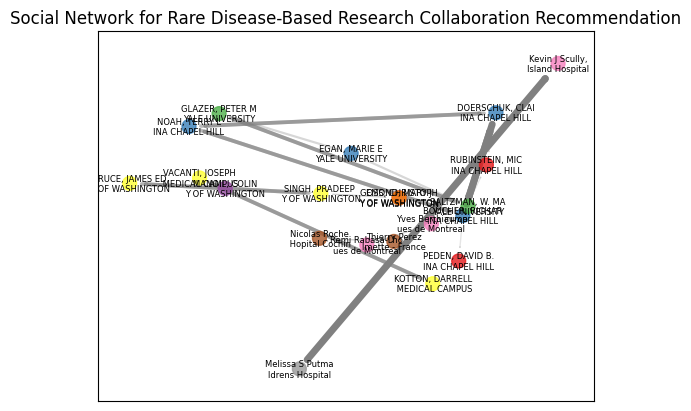

In [ ]:
pos = layout_algorithms[-1](G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)

# Draw edges with variable width and alpha based on weights
# Draw edges with variable width and alpha based on weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Check if all weights are the same
if len(set(edge_weights.values())) == 1:
    max_weight = min_weight = next(iter(edge_weights.values()))
else:
    max_weight = max(edge_weights.values())
    min_weight = min(edge_weights.values())

for edge, weight in edge_weights.items():
    if max_weight != min_weight:  # Avoid division by zero if all weights are the same
        normalized_weight = (weight - min_weight) / (max_weight - min_weight)  # Normalize weight between 0 and 1
    else:
        normalized_weight = 0.5  # Set normalized weight to 0.5 if all weights are the same
    width = 1 + 4 * normalized_weight  # Adjust width based on normalized weight
    alpha = 0.2 + 0.8 * normalized_weight  # Adjust alpha (transparency) based on normalized weight
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=width, alpha=alpha, edge_color='gray', arrowsize=1)

# Label styling
#labels = {node: f"{node}\n{G.nodes[node]['institution']}" for node in G.nodes}
labels = {node: f"{node[:15]}\n{G.nodes[node]['institution'][-15:]}" for node in G.nodes}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=6, font_color='black')

# Add a title
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")

# Show the plot
plt.show()

In [ ]:
!pip install python-louvain

In [ ]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, edges in combined_dict.items():
    G.add_node(nodes[0], institution=nodes[1])
    #G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

# Draw the graph with nodes colored by their community
pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
#nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=None)
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")

plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-868006fcc459>", line 22, in <cell line: 22>
    pos = nx.kamada_kawai_layout(G)
  File "/usr/local/lib/python3.10/dist-packages/networkx/drawing/layout.py", line 709, in kamada_kawai_layout
    pos = _kamada_kawai_solve(dist_mtx, pos_arr, dim)
  File "/usr/local/lib/python3.10/dist-packages/networkx/drawing/layout.py", line 726, in _kamada_kawai_solve
    optresult = sp.optimize.minimize(
  File "/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py", line 710, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
  File "/usr/local/lib/python3.10/dist-packages/scipy/optimize/_lbfgsb_py.py", line 365, in _minimize_lbfgsb
    f, g = func_and_grad(x)
  File "/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentiable_functions.py", li

TypeError: object of type 'NoneType' has no len()

<ipython-input-11-5f267446c8ae>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
<ipython-input-11-5f267446c8ae>:29: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_undirected, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


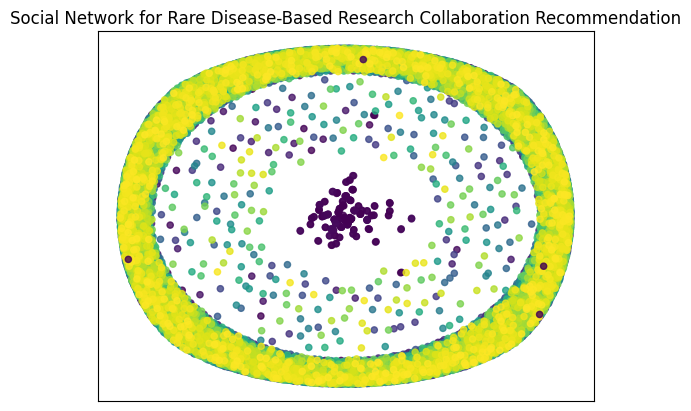

In [ ]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.MultiDiGraph()

# Add nodes and edges from the dictionary
nodes = []
edges = []
for node, node_edges in combined_dict.items():
    nodes.append((node[0], {'institution': node[1]}))
    edges.extend([(node[0], edge[0]) for edge in node_edges])

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Convert to undirected graph
G_undirected = G.to_undirected()

# Detect communities using Louvain method
partition = community_louvain.best_partition(G_undirected)

# Draw the graph with nodes colored by their community
pos = nx.spring_layout(G_undirected)  # Faster layout algorithm
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map

nx.draw_networkx_nodes(G_undirected, pos, node_size=20, node_color=[cmap(partition[node]) for node in G_undirected.nodes()], alpha=0.8)
nx.draw_networkx_edges(G_undirected, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()

<ipython-input-90-615f987bd557>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
<ipython-input-90-615f987bd557>:23: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


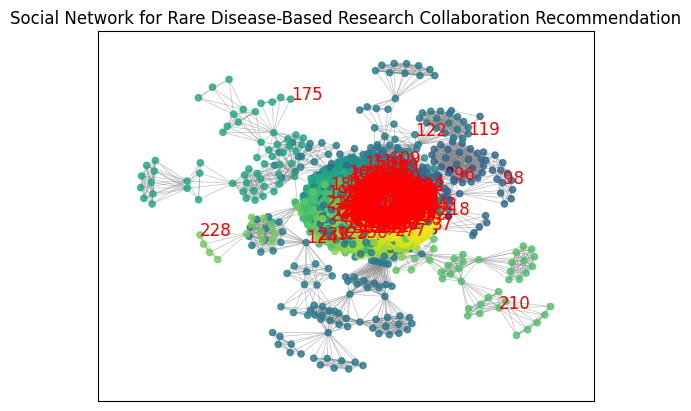

In [ ]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, edges in combined_dict.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

# Draw the graph with nodes colored by their community
pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)

# Label one node per community with its community partition value near its community
community_labels = {}
for node, community_id in partition.items():
    if community_id not in community_labels:
        community_labels[community_id] = node

for community_id, node in community_labels.items():
    x, y = pos[node]
    plt.text(x, y, str(community_id), fontsize=12, color='red')

plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()



In [ ]:
top_communities=[19,13,57,96,98,119,122, 124,175,210,228]

In [ ]:
display('ClinicalTrial:',ClinicalTrial.columns)
display('Grant:',Grant.columns)
display('Pubmed:',Pubmed.columns)

'ClinicalTrial:'

Index(['i.OfficialName', 'i.OfficialAffiliation', 'c. BriefTitle',
       'c.OfficialTitle', 'c.BriefSummary', 'c.NCTId', 'l.LocationCity',
       'l.LocationCountry', 'l.LocationFacility', 'concatenatedInterventions',
       'name'],
      dtype='object')

'Grant:'

Index(['pi.pi_name', 'pi.org_name', 'p.title', 'p.application_id',
       'p.abstract', 'p.terms', 'co.core_project_num', 'name'],
      dtype='object')

'Pubmed:'

Index(['a.fullName', 'ar.title', 'ar.affiliation', 'ar.pubmed_id',
       'ar.abstractText', 'concatenatedKeywords', 'concatenatedMeshterms',
       'name'],
      dtype='object')

In [ ]:
combined_dict[data_table['Node'][0]]

[('Thierry Perez', 'CHRU de Lille / Hôpital Calmette - France')]

In [ ]:
combined_dict[('Nicolas Roche',
  'APHP- Hopital Cochin')]

[('Thierry Perez', 'CHRU de Lille / Hôpital Calmette - France')]

In [75]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, edges in combined_dict.items():
    G.add_node(nodes)
    for edge in edges:
        G.add_node(edge)
        G.add_edge(nodes, edge)

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)
data_table = pd.DataFrame(partition.items(), columns=['Node', 'Community'])
data_table['network']=data_table.apply(lambda x: combined_dict[x['Node']] ,axis=1)
data_table

Node  Community network
0     (William Balistreri, Childrens Hospital Medica...          0      {}
1     (Kenneth Setchell, Childrens Hospital Medical ...          1      {}
2           (Robert Aris, University of North Carolina)          2      {}
3                                    (Dana Hardin, nan)          3      {}
4     (Lori Stark, Childrens Hospital & Medical Center)          4      {}
...                                                 ...        ...     ...
8092  (Tarran R, Department of Cell Biology & Physio...       8021      {}
8093  (Alexis NE, Department of Cell Biology & Physi...       8022      {}
8094  (Coakley RD, Department of Cell Biology & Phys...       8023      {}
8095  (Ghosh A, Department of Cell Biology & Physiol...         24      {}
8096  (Aslam S, Center for Innovative Phage Applicat...         53      {}

[8097 rows x 3 columns]

In [76]:
data_table[data_table['network']!=set()]

Node  Community  \
5    (Ronald Gibson, M.D., Ph.D, Childrens Hospital...          5   
6    (George Retsch-Bogart, University of North Car...          5   
7            (Peter Hiatt, Baylor College of Medicine)          5   
8    (Robert Wilmott, Childrens Hospital & Medical ...          5   
9    (Richard Moss, Stanford University/Lucille Pac...          5   
..                                                 ...        ...   
383                         (Adam Stein, Northwestern)        315   
384                (Jessica Alvarez, Emory University)        315   
385   (Melissa Putman, Massachusetts General Hospital)        315   
387      (Melissa S Putman, Boston Childrens Hospital)        317   
388  (Kevin J Scully, Mb Bch Bao, Rhode Island Hosp...        317   

                                               network  
5    {(George Retsch-Bogart, University of North Ca...  
6    {(Peter Hiatt, Baylor College of Medicine), (R...  
7    {(George Retsch-Bogart, University of North Ca...  
8    {(George Retsch-Bogart, University of North Ca...  
9    {(George Retsch-Bogart, University of North Ca...  
..                                                 ...  
383  {(Jessica Alvarez, Emory University), (Melissa...  
384  {(Adam Stein, Northwestern), (Melissa Putman, ...  
385  {(Jessica Alvarez, Emory University), (Adam St...  
387  {(Kevin J Scully, Mb Bch Bao, Rhode Island Hos...  
388    {(Melissa S Putman, Boston Childrens Hospital)}  

[114 rows x 3 columns]

In [77]:
ClinicalTrial['name'] = ClinicalTrial.apply(lambda row: (row['i.OfficialName'], row['i.OfficialAffiliation']), axis=1)
Grant['name'] = Grant.apply(lambda row: (row['pi.pi_name'], row['pi.org_name']), axis=1)
Pubmed['name'] = Pubmed.apply(lambda row: (row['a.fullName'], row['ar.affiliation']), axis=1)


In [78]:
ClinicalTrial['c.BriefSummary']=ClinicalTrial['c.OfficialTitle']+ClinicalTrial['concatenatedInterventions']+ClinicalTrial['c.BriefSummary']
Grant['c.BriefSummary']=Grant['p.title']+Grant['p.terms']+Grant['p.abstract']
Pubmed['ar.abstractText']=Pubmed['ar.title']+Pubmed['concatenatedKeywords']+Pubmed['concatenatedMeshterms']+Pubmed['ar.abstractText']

ClinicalTrial['Terms']=ClinicalTrial['concatenatedInterventions']
Grant['Terms']=Grant['p.terms']
Pubmed['Terms']=Pubmed['concatenatedKeywords']+Pubmed['concatenatedMeshterms']



#df1=ClinicalTrial[['i.OfficialName',  'c.BriefSummary', 'i.OfficialAffiliation','name']]
df1=ClinicalTrial[['i.OfficialName',  'c.BriefSummary', 'l.LocationCity','name','Terms', 'fip', 'lat', 'lng']]
df2=Grant[['pi.pi_name', 'p.abstract', 'pi.org_name','name','Terms', 'fip', 'lat', 'lng']]
df3=Pubmed[['a.fullName',  'ar.abstractText', 'ar.affiliation','name','Terms', 'fip', 'lat', 'lng']]
# Rename columns to avoid conflicts
df1.columns = ['PI','Abstract', 'Location','name','Terms', 'fip', 'lat', 'lng']
df2.columns = ['PI','Abstract', 'Location','name','Terms', 'fip', 'lat', 'lng']
df3.columns = ['PI','Abstract', 'Location','name','Terms', 'fip', 'lat', 'lng']
#df2['Location']=  df2['locationCity'] +' , '+df2['Location']
result_df = pd.concat([df1  , df2, df3])
#result_df = pd.concat([df1,  df3])
result_df=result_df.drop_duplicates()

In [29]:
data_table=data_table[data_table['network']!=set()]

In [79]:
#merged_data1 = pd.merge(data_table, ClinicalTrial, left_on='Node', right_on='name', how='inner')
#merged_data2 = pd.merge(data_table, Grant, left_on='Node', right_on='name', how='inner')
#merged_data3 = pd.merge(data_table, Pubmed, left_on='Node', right_on='name', how='inner')
#concatenated_data = pd.concat([merged_data1, merged_data2, merged_data3], axis=0)
#concatenated_data = concatenated_data.drop_duplicates(subset=['name'])
#concatenated_data.reset_index(drop=True, inplace=True)

merged_data1 = pd.merge(data_table, result_df, left_on='Node', right_on='name', how='inner')
concatenated_data = merged_data1.drop_duplicates(subset=['name'])
concatenated_data.reset_index(drop=True, inplace=True)
concatenated_data=concatenated_data.drop(['name'],axis=1)

In [57]:
concatenated_data['Terms']=concatenated_data.apply(lambda x:  x['Terms'].split("'") ,axis=1)
len(concatenated_data['Community'].unique())

73

In [58]:
import pandas as pd

# Function to sum string columns
def sum_strings(series):
    return ', '.join(series)

def sum_terms(series):
    result = []
    for sublist in series:
        result.extend(sublist)
    return result

# Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
result = concatenated_data.groupby('Community').agg({
    'Abstract': sum_strings,
    'Terms': sum_terms
}).reset_index()

result

Community                                           Abstract  \
0           5  A Phase II Multicenter Randomized Trial of Tob...   
1           7  Pulmonary Benefits of Cystic Fibrosis Neonatal...   
2          16  A Cross-Over Comparative Study of Inhaled Mann...   
3          20  Standard vs. Biofilm Susceptibility Testing in...   
4          38  The CF Wellness Program to Treat FatigueCF Wel...   
..        ...                                                ...   
68        646  COVID-19 Antibody Responses In Cystic Fibrosis...   
69        662  A Multi-Center Study of Non-Invasive Colorecta...   
70        674  Strength and Muscle Related Outcomes for Nutri...   
71        677  Gut Imaging for Function and Transit in Cystic...   
72        680  The Effects of a Low Glycemic Load Diet on Dys...   

                                                Terms  
0   [Tobramycin for Inhalation, Tobramycin solutio...  
1   [CF newborn screening, CF newborn screening, C...  
2   [Dornase alpha, mannitol + pulmozyme, mannitol...  
3   [IV tobramycin, IV ticarcillin-clavulanate, IV...  
4   [CF Wellness Program Sessions, Qualitative Int...  
..                                                ...  
68  [Blood sampling, Blood sampling, Blood samplin...  
69            [Stool tests, Stool tests, Stool tests]  
70  [BMI and lean mass index from DXA, skinfold an...  
71  [Elexacaftor / Ivacaftor / Tezacaftor, Elexaca...  
72   [Low Glycemic Load Diet, Low Glycemic Load Diet]  

[73 rows x 3 columns]

In [59]:
result.to_csv('concatenated_data.csv')

In [ ]:
from transformers import pipeline
qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def ask_question(context):
    # Load the pretrained question-answering model
    # Provide the context and question to the model
    answer = qa_pipeline(question="what are the main technical skills?", context=context)

    return answer['answer']
def extract_topics_lda_grouped(df):
    # Group by 'Topic' and sum 'Abstract'
    grouped_df = df.groupby('Community')['Abstract'].sum().reset_index()

    # Initialize an empty list to store the results for each topic
    results = dict()
    # Apply LDA to each grouped abstract
    n=1
    for index, row in grouped_df.iterrows():
      if n <12:
        community = row['Community']
        abstract = row['Abstract']

        # Tokenize and apply LDA
        topics_found = ask_question(abstract)

        # Append the result to the list
        results[community]= topics_found
        print(community,topics_found)
        n+=1
    return results
# Function call
grouped_results = extract_topics_lda_grouped(concatenated_data)

# Display results
#print(grouped_results)

0 psychometric evaluation of a self-administered dyspnea questionnaire
1 muscle strength and endurance
2 continuous glucose monitors
3 Safety, Tolerability, and Pharmacokinetics
4 discover safe drugs that correct the basic defect and prevent lung disease
5 provide findings that will assist in the interpretation of the trial results
6 Analysis of Inhaled and Lost Doses
7 Specific enzymes
8 Procedures
9 Outlook and conclusion
10 on-demand webinars or in-service by trained site educators


In [ ]:
concatenated_data['Community'].max()

371

In [ ]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, edges in combined_dict.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

<ipython-input-99-5bb2ede75ed8>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
<ipython-input-99-5bb2ede75ed8>:18: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


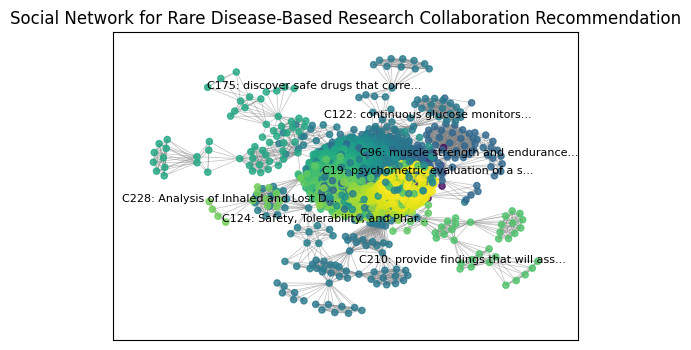

In [ ]:
# Calculate the size of each community
plt.figure(figsize=(6, 4))


community_sizes = {}
for node, community_id in partition.items():
    if community_id not in community_sizes:
        community_sizes[community_id] = 0
    community_sizes[community_id] += 1

# Sort communities by size and get the top 10 largest communities
top_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[10:20]
top_communities=[19,96,122, 124,175,210,228]
# Draw the graph with nodes colored by their community
pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
n=0
# Label the top 10 largest communities with their community partition value near their community
for community_id in top_communities:
    for node, cid in partition.items():
        if cid == community_id:
            x, y = pos[node]
            if community_id in [124]:
              plt.text(x-0.4, y-0.1, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            elif community_id in [210]:
               plt.text(x-0.6, y, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            else:
              plt.text(x-0.4, y, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            n+=1
            break

plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()

<ipython-input-104-16e69584c5ca>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
<ipython-input-104-16e69584c5ca>:18: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


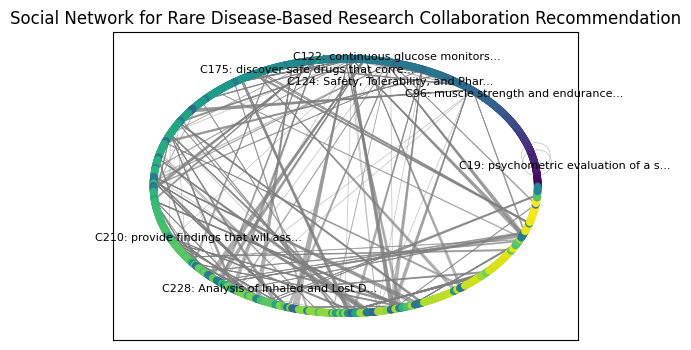

In [ ]:
# Calculate the size of each community
plt.figure(figsize=(6, 4))


community_sizes = {}
for node, community_id in partition.items():
    if community_id not in community_sizes:
        community_sizes[community_id] = 0
    community_sizes[community_id] += 1

# Sort communities by size and get the top 10 largest communities
top_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[10:20]
top_communities=[19,96,122, 124,175,210,228]
# Draw the graph with nodes colored by their community
pos = layout_algorithms[0](G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
n=0
# Label the top 10 largest communities with their community partition value near their community
for community_id in top_communities:
    for node, cid in partition.items():
        if cid == community_id:
            x, y = pos[node]
            if community_id in [124]:
              plt.text(x-0.4, y-0.2, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            elif community_id in [175]:
               plt.text(x-0.6, y-0.1, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            else:
              plt.text(x-0.4, y, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            n+=1
            break

plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()

In [ ]:
top_communities

[96, 125, 282, 109, 112, 127, 132, 138, 153, 221]

<ipython-input-106-3582c3e78a98>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_communities)
<ipython-input-106-3582c3e78a98>:32: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


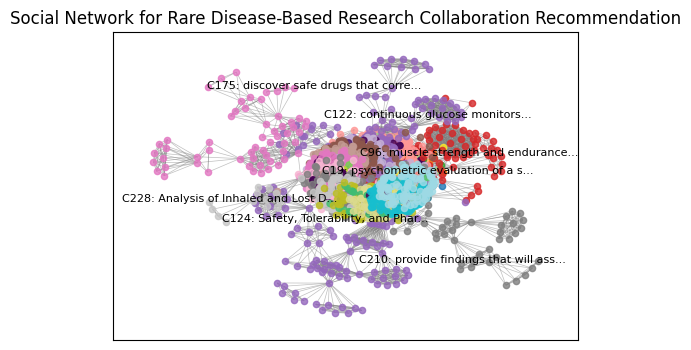

In [ ]:
# Calculate the size of each community
plt.figure(figsize=(6, 4))


community_sizes = {}
for node, community_id in partition.items():
    if community_id not in community_sizes:
        community_sizes[community_id] = 0
    community_sizes[community_id] += 1

# Sort communities by size and get the top 10 largest communities
top_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[10:20]
top_communities=[19,96,122, 124,175,210,228]
# Draw the graph with nodes colored by their community
pos = layout_algorithms[-1](G)
#cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
#nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)

# Retrieve the number of communities
num_communities = max(partition.values()) + 1

# Generate a distinct color for each community
color_map = plt.cm.get_cmap('tab20', num_communities)

# Draw nodes and edges
for community_id in range(num_communities):
    nodes_in_community = [node for node, comm in partition.items() if comm == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_community, node_size=20, node_color=color_map(community_id), alpha=0.8)



nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
n=0
# Label the top 10 largest communities with their community partition value near their community
for community_id in top_communities:
    for node, cid in partition.items():
        if cid == community_id:
            x, y = pos[node]
            if community_id in [124]:
              plt.text(x-0.4, y-0.1, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            elif community_id in [210]:
               plt.text(x-0.6, y, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            else:
              plt.text(x-0.4, y, 'C'+str(community_id)+': '+grouped_results[n][:30]+'...', fontsize=8, color='black')
            n+=1
            break

plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()

<ipython-input-105-477c9402320a>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_communities)
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(
<ipython-input-105-477c9402320a>:14: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value fo

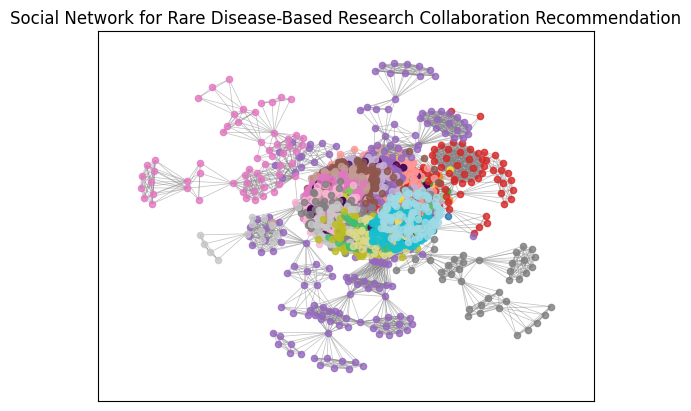

In [ ]:
pos = layout_algorithms[-1](G)

# Retrieve the number of communities
num_communities = max(partition.values()) + 1

# Generate a distinct color for each community
color_map = plt.cm.get_cmap('tab20', num_communities)

# Draw nodes and edges
for community_id in range(num_communities):
    nodes_in_community = [node for node, comm in partition.items() if comm == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_community, node_size=20, node_color=color_map(community_id), alpha=0.8)

nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()

<ipython-input-112-598df7bedf71>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_communities)
<ipython-input-112-598df7bedf71>:14: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


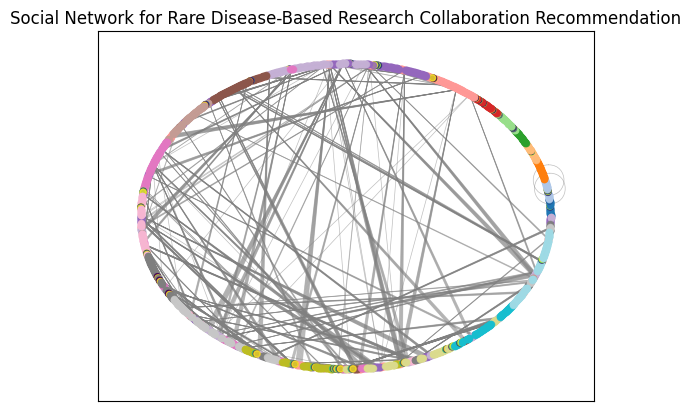

In [ ]:
pos = layout_algorithms[0](G)

# Retrieve the number of communities
num_communities = max(partition.values()) + 1

# Generate a distinct color for each community
color_map = plt.cm.get_cmap('tab20', num_communities)

# Draw nodes and edges
for community_id in range(num_communities):
    nodes_in_community = [node for node, comm in partition.items() if comm == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_community, node_size=20, node_color=color_map(community_id), alpha=0.8)

nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()

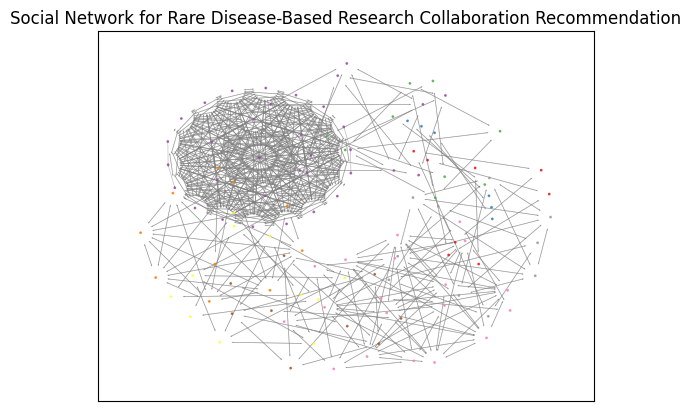

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your provided dictionary
data = combined_dict
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Determine connected components
components = list(nx.strongly_connected_components(G))
# Assign colors to nodes based on connected components
color_map = {}
for i, component in enumerate(components):
    for node in component:
        color_map[node] = plt.cm.Set1(i / len(components))  # Set1 colormap for variety

# Draw the graph with enhanced styling
#fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

#pos = nx.spring_layout(G, seed=42, k=1, iterations=1)
pos = nx.kamada_kawai_layout(G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=1, node_color=node_colors, alpha=0.8)
# Edge styling
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)
# Label styling
#labels = {node: f"{node}\n{G.nodes[node]['institution']}" for node in G.nodes}
#nx.draw_networkx_labels(G, pos, labels=labels, font_size=5, font_color='black')
# Add a title
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
# Show the plot
plt.show()

In [ ]:
new_dict = {}
# Iterate through the items of combined_dict and construct the new dictionary
for key, value in combined_dict.items():
    # Simplify the key by taking the second part
    simplified_key = key[1]
    # Simplify the values by taking the second part of each tuple in the list
    simplified_values = [v[1] for v in value]

    # Check if simplified_key already exists in the new dictionary
    if simplified_key in new_dict:
        # If yes, append the new values to the existing list
        new_dict[simplified_key].extend(simplified_values)
    else:
        # If not, initialize a new list with the values
        new_dict[simplified_key] = simplified_values
# Check for repetition in values list and remove values similar to key
for key, values in new_dict.items():
    new_values = []
    for value in values:
        if value != key:  # Check if value is not similar to key
            new_values.append(value)
    # Remove repetition
    new_dict[key] = list(set(new_values))
new_dict = {key: value for key, value in new_dict.items() if value}


In [ ]:
dict(list(new_dict.items())[:21])

{'APHP- Hopital Cochin': ['CHRU de Lille / Hôpital Calmette - France'],
 'CHRU de Lille / Hôpital Calmette - France': ['APHP- Hopital Cochin'],
 'Boston Childrens Hospital': ['Johns Hopkins University',
  'Rhode Island Hospital'],
 'Rhode Island Hospital': ['Boston Childrens Hospital'],
 'ICON Early Phase Services (Parts 1 & 2)': ['Medical University of South Carolina (Parts 3 & 4)'],
 'Medical University of South Carolina (Parts 3 & 4)': ['ICON Early Phase Services (Parts 1 & 2)'],
 'Cliniques universitaires Saint-Luc, service de pneumologie': ['University of Health Sciences (HESAV)',
  'School of Gestion and Engineering Vaud (HEIG-VD)',
  'Cliniques universitaires Saint-Luc, service des soins intensifs'],
 'Cliniques universitaires Saint-Luc, service des soins intensifs': ['University of Health Sciences (HESAV)',
  'School of Gestion and Engineering Vaud (HEIG-VD)',
  'Cliniques universitaires Saint-Luc, service de pneumologie'],
 'School of Gestion and Engineering Vaud (HEIG-VD)': [

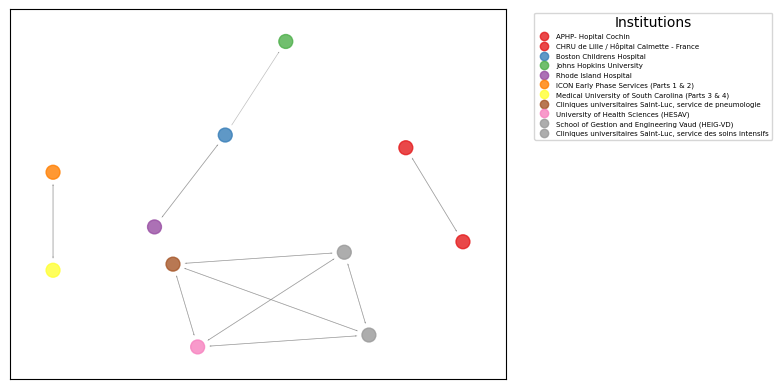

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your provided dictionary
data = dict(list(new_dict.items())[:10])
# Create a directed graph
G = nx.DiGraph()
# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes)
    for edge in edges:
        G.add_node(edge)
        G.add_edge(nodes, edge)

# Generate layout
pos = layout_algorithms[-1](G)

# Generate a list of completely distinct colors for nodes
node_colors = range(len(G.nodes))

# Node styling with specified colors
nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, cmap=plt.cm.Set1, alpha=0.8)

# Rest of the code remains the same
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in G.edges if u != v], edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)

legend_labels = {node: node for node in G.nodes}

# Create a legend with labels
plt.legend(handles=nodes.legend_elements()[0], labels=list(legend_labels.values()), title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Show the plot
plt.show()

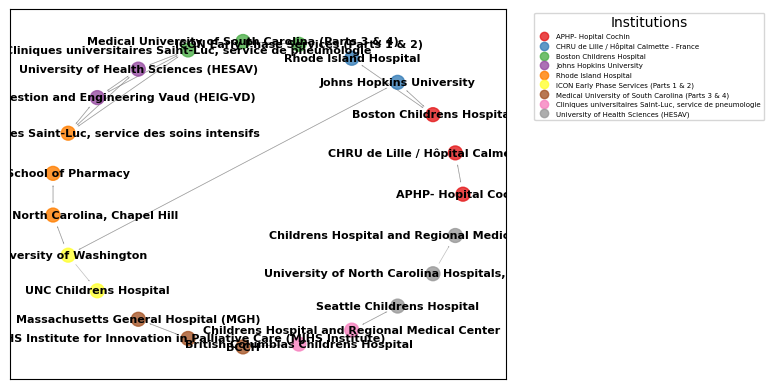

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your provided dictionary
data = dict(list(new_dict.items())[:21])

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes)
    for edge in edges:
        G.add_node(edge)
        G.add_edge(nodes, edge)

# Generate layout
pos = layout_algorithms[0](G)

# Generate a list of completely distinct colors for nodes
node_colors = range(len(G.nodes))

# Node styling with specified colors
nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, cmap=plt.cm.Set1, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v in G.edges if u != v], edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)

# Draw labels on top of nodes
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

# Create a legend with labels
legend_labels = {node: node for node in G.nodes}
plt.legend(handles=nodes.legend_elements()[0], labels=list(legend_labels.values()), title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Show the plot
plt.show()

In [ ]:
node_colors

range(0, 23)

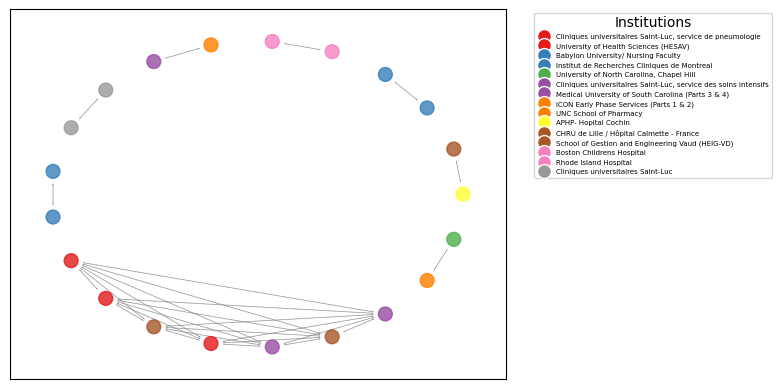

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your provided dictionary
data= dict(list(combined_dict.items())[:21])

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

unique_institutions = set(nx.get_node_attributes(G, 'institution').values())

# Assign colors to nodes based on institutions
color_map = {}
for i, institution in enumerate(unique_institutions):
    nodes_with_institution = [node for node, data in G.nodes(data=True) if data['institution'] == institution]
    for node in nodes_with_institution:
        color_map[node] = plt.cm.Set1(i / len(unique_institutions))
# Draw the graph with enhanced styling
#fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size

# Draw the graph with enhanced styling
#pos = nx.spring_layout(G , seed=42, k=1, iterations=1)
pos = layout_algorithms[0](G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)
# Rest of the code remains the same
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(i / len(unique_institutions)), markersize=10, label=institution) for i, institution in enumerate(unique_institutions)]
plt.legend(handles=legend_handles, title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Label styling without displaying the institution names
#labels = {node: node for node in G.nodes}
#nx.draw_networkx_labels(G, pos, labels=labels, font_size=5, font_color='black')

# Show the plot
plt.show()

<ipython-input-183-58164052526c>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_institutions))


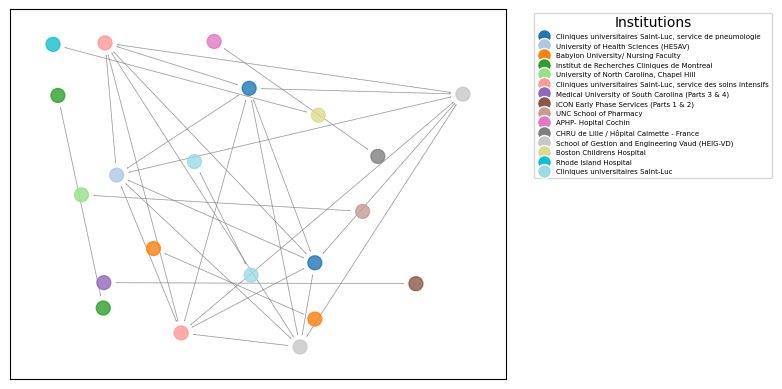

In [ ]:

# Define a colormap with enough distinct colors
cmap = plt.cm.get_cmap('tab20', len(unique_institutions))

# Assign colors to nodes based on institutions
color_map = {}
for i, institution in enumerate(unique_institutions):
    nodes_with_institution = [node for node, data in G.nodes(data=True) if data['institution'] == institution]
    for node in nodes_with_institution:
        color_map[node] = cmap(i)

# Draw the graph with enhanced styling
#pos = nx.spring_layout(G, seed=42, k=1, iterations=1)
pos=layout_algorithms[0](G)
# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)

# Rest of the code remains the same
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10, label=institution) for i, institution in enumerate(unique_institutions)]
plt.legend(handles=legend_handles, title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Show the plot
plt.show()

In [ ]:
def common_keys(dict1, dict2):
    return [key for key in dict1.keys() if key in dict2]

# Example usage
dict1 = {'a': 1, 'b': 2, 'c': 3}
dict2 = {'b': 4, 'c': 5, 'd': 6}

common_keys_list = common_keys(dict1, dict2)
print(common_keys_list)
display(common_keys(a, b))
display(common_keys(a, c))
common_keys(b, c)

['b', 'c']


[]

[]

[]

# US Map

In [ ]:
concatenated_data.head()

Node  Community network  \
0  (William Balistreri, Childrens Hospital Medica...          0      {}   
1  (Kenneth Setchell, Childrens Hospital Medical ...          1      {}   
2        (Robert Aris, University of North Carolina)          2      {}   
3                                 (Dana Hardin, nan)          3      {}   
4  (Lori Stark, Childrens Hospital & Medical Center)          4      {}   

                   PI                                           Abstract  \
0  William Balistreri  nanursodiolOBJECTIVES: I. Compare the bioavail...   
1    Kenneth Setchell  nanursodiol, tauroursodeoxycholic acidOBJECTIV...   
2         Robert Aris  nancholecalciferol, calcium carbonate, alendro...   
3         Dana Hardin  nanHuman recombinant growth hormoneCystic Fibr...   
4          Lori Stark  Behavioral Treatment of Weight Gain in CFBehav...   

         Location                                              Terms    fip  \
0      Cincinnati                                           ursodiol  19007   
1      Cincinnati                ursodiol, tauroursodeoxycholic acid  19007   
2     Chapel Hill  cholecalciferol, calcium carbonate, alendronat...  47117   
3  Salt Lake City                   Human recombinant growth hormone  49035   
4      Cincinnati                               Behavioral Treatment  19007   

       lat       lng  
0  40.6309  -92.9222  
1  40.6309  -92.9222  
2  35.6283   -86.697  
3  40.7776 -111.9311  
4  40.6309  -92.9222

In [ ]:
fip_finding=pd.read_csv('/content/uscities.csv')

In [80]:
concatenated_data1=concatenated_data
Node=[]
Edge=[]
Node=list(set(list(concatenated_data1['fip'].values)))
for i in concatenated_data1.index:
     for j in concatenated_data1['network'][i]:
           filtered_data = concatenated_data1[concatenated_data1['Node'] == j]
           if not filtered_data.empty:
                  value = filtered_data['fip'].iloc[0]
                  edge=( concatenated_data1['fip'][i],value )
                  Edge.append(edge)
           else: pass

Edge=list(set(Edge))

In [81]:
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
#G = nx.Graph()
G=nx.DiGraph()
G.add_nodes_from(Node)
G.add_edges_from(Edge)
#nx.info(G)

In [82]:
Node_utility=Node
Edge_utility=[]
Fips_utlity=Node
Lat_utlity=[]
Log_utlity=[]
n=0
while n < len(Node_utility):
      Lat_utlity.append(  concatenated_data1[concatenated_data1['fip']==Node[n]]['lat'].iloc[0] )
      Log_utlity.append(  concatenated_data1[concatenated_data1['fip']==Node[n]]['lng'].iloc[0] )
      n+=1
      #Node_utility.append(Utility_County[0][i])

G_utility=nx.DiGraph()
G_utility.add_nodes_from(Node_utility)
G_utility.add_edges_from(Edge_utility)

In [83]:
import numpy as np
Fips_latlong_utility=pd.DataFrame()
Fips_latlong_utility['Utility Number']=Node_utility
Fips_latlong_utility['fips']=Node_utility
Fips_latlong_utility['Latitude']=Lat_utlity
Fips_latlong_utility['Longitude']=Log_utlity


data_G=pd.DataFrame()
data_G['Node']=Node
d = nx.degree(G)
data_G['degree']=d

data_G_utility=pd.DataFrame()
data_G_utility['Node']=Fips_latlong_utility['Utility Number']
data_G_utility['degree']=''
for i in range(data_G_utility.shape[0]):
    if Fips_latlong_utility['fips'][i] in data_G['Node'].values:
        data_G_utility.at[i,'degree'] = data_G.loc[data_G['Node'] == Fips_latlong_utility['fips'][i]]['degree'].item()
    else:
        data_G_utility.at[i,'degree'] = 1

In [84]:
for i in range(data_G_utility.shape[0]):
     data_G_utility.at[i,'degree']=data_G_utility['degree'][i][1]
List=np.array(data_G_utility['degree'].astype(float))

In [85]:
!python -m pip install basemap
#!python -m pip install basemap-data-hires


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


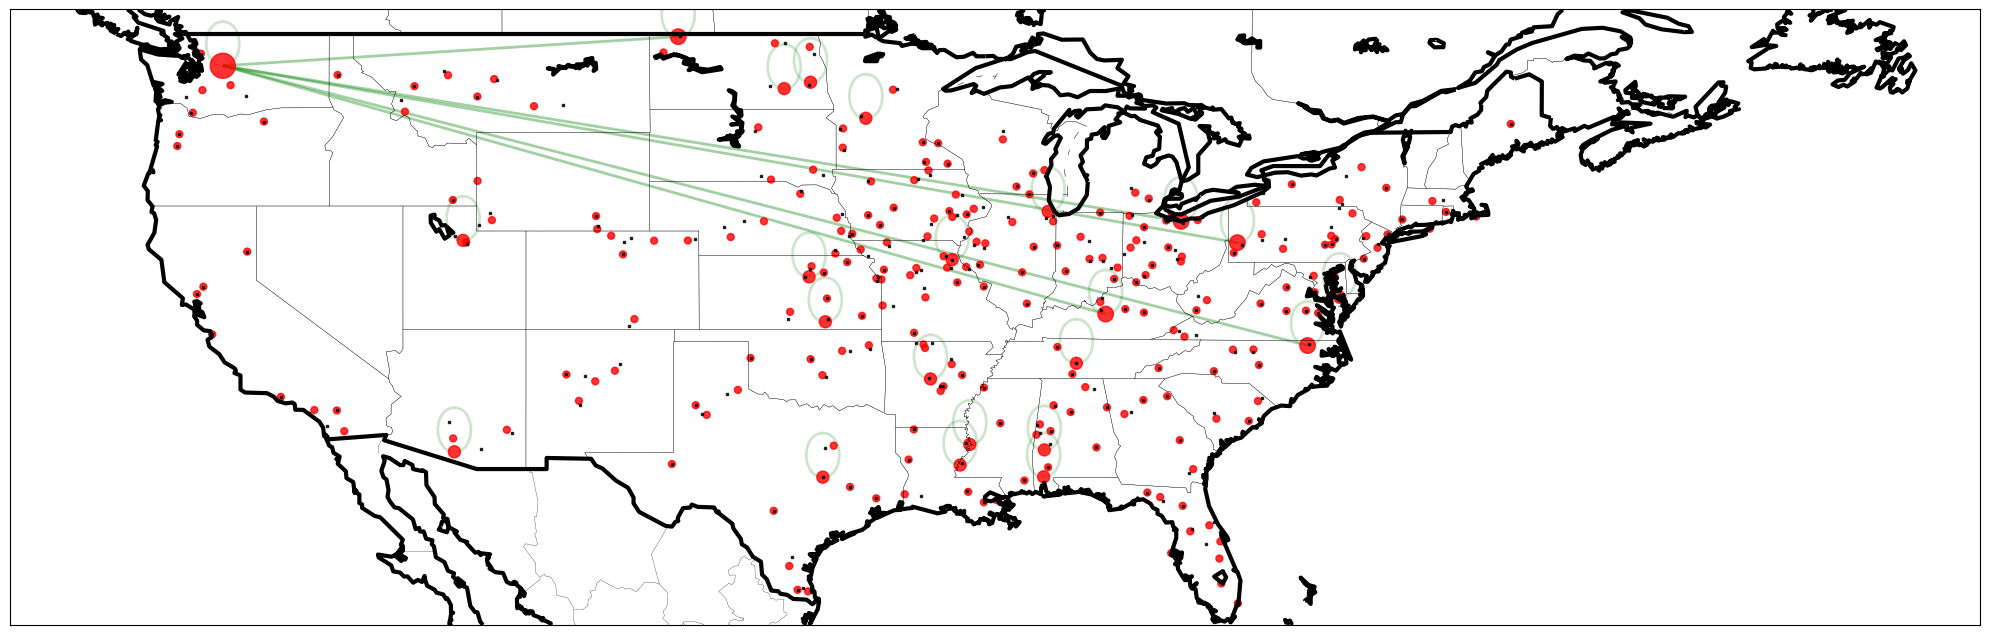

In [86]:
from mpl_toolkits.basemap import Basemap as Basemap
plt.figure(figsize = (20,9))
m = Basemap(
         #projection='merc',   'mill',  'cyl'
         llcrnrlon=-130,    #-180,  left
         llcrnrlat=25,         #   10,  south
         urcrnrlon=-50,   #-50, right
         urcrnrlat=50,    #70,  North
         lat_ts=0,
         resolution='l',     #   c - crude,  l - low,  h - high,  f - full
         suppress_ticks=True)

mx, my = m(pd.to_numeric(fip_finding['lng'].astype(str).str.replace('–', '-', regex=True), downcast='float').values,  pd.to_numeric(fip_finding['lat'], downcast='float').values)

############ Counties
#mx, my = m(pd.to_numeric(fip_finding['lng'].str.replace('–', '-', regex=True), downcast='float').values,  pd.to_numeric(fip_finding['lat'], downcast='float').values)
pos = {}

fip_finding['county_fips'] = fip_finding['county_fips'].astype(str)
fip_finding['county_fips'] = fip_finding['county_fips'].apply(lambda x: '{0:0>5}'.format(x))

for count, elem in enumerate (fip_finding['county_fips'].values):
      pos[elem] = (mx[count], my[count])


#pos=nx.spring_layout(G)
d = nx.degree(G)
d = [(d[node]+1) * 25 for node in G.nodes()]
nx.draw_networkx_nodes(G , pos = pos, node_color = 'r', alpha = 0.8, node_size=d) #node_size = 4)
nx.draw_networkx_edges(G , pos = pos, edge_color='g',alpha=0.2, arrows = False, width=2)



####### Utilities
#mx1, my1 = m(pd.to_numeric(Fips_latlong_utility['Longitude'].str.replace('–', '-', regex=True), downcast='float').values,  pd.to_numeric(Fips_latlong_utility['Latitude'], downcast='float').values)
pos1 = {}
#for count, elem in enumerate (Fips_latlong_utility['Utility Number'].values):
#       pos1[elem] = (mx[count], my[count])
n=0
while n<len(Node_utility):
  pos1[Node_utility[n]] = (Log_utlity[n],Lat_utlity[n])
  n+=1

dd = List*1
nx.draw_networkx_nodes(G_utility , pos = pos1,node_shape ='s' , node_color = 'k', alpha = 0.8,node_size=1) #node_size = 4,   node_shape  'so^>v<dph8'
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
#plt.savefig("/content/drive/Shareddrives/MY Files/Utility-based /map_1.png", format = "png", dpi = 300)
plt.show()

In [ ]:
!pip install python-louvain

Cliques: A clique in a network is a subset of nodes where every pair of nodes is connected by an edge. In other words, a clique is a fully connected subgraph within a larger graph. Cliques are useful for studying tightly-knit communities or groups of nodes within a network.

PageRank: PageRank is an algorithm used to measure the importance of nodes in a network, particularly in web graphs. The algorithm assigns a numerical weight to each node in the network based on the structure of the incoming links. Nodes with higher PageRank scores are considered more important or influential in the network.

Hubs: In the context of networks, hubs are nodes with a high degree, meaning they have many connections to other nodes. Hubs play a crucial role in network communication, as they often serve as central points for information flow.

Authorities: Authorities are nodes that are pointed to by many hubs. In other words, they are nodes that are frequently referenced by other nodes in the network. Authorities are important for providing valuable content or resources in the network.

In [ ]:
G=nx.Graph()
G.add_nodes_from(Node)
G.add_edges_from(Edge)

###########################################################  Cliques ###################################
cl=nx.enumerate_all_cliques(G)
#print last 10 cliques
print([l for l in cl][-10:])
#"5 Largest Cliques"
print("5 Largest Cliques",sorted([l for l in nx.find_cliques(G)],key=lambda x: len(x),reverse=True)[:5])

##################################################### PAGERANK and HITS  ###################################
pg_rank=sorted([l for l in nx.pagerank(G).items()],key=lambda x: x[1],reverse=True)
print("Top 10 county By Pagerank",pg_rank[:10])

hubs,authorities=nx.hits(G)
hubs=sorted([l for l in hubs.items()],key=lambda x: x[1],reverse=True)
authorities=sorted([l for l in authorities.items()],key=lambda x: x[1],reverse=True)
print("Top 10 Biggest Hubs",hubs[:10])
print("\nTop 10 Biggest Authorities",authorities[:10])


[['01119'], ['19007'], ['48331'], ['17031'], ['35047'], ['39043', '53033'], ['21179', '53033'], ['42003', '53033'], ['38013', '53033'], ['53033', '37131']]
5 Largest Cliques [['53033', '39043'], ['53033', '21179'], ['53033', '37131'], ['53033', '42003'], ['53033', '38013']]
Top 10 county By Pagerank [('53033', 0.06830462384845891), ('01097', 0.032466125421205874), ('24019', 0.032466125421205874), ('38093', 0.032466125421205874), ('20143', 0.032466125421205874), ('22065', 0.032466125421205874), ('04019', 0.032466125421205874), ('49035', 0.032466125421205874), ('27121', 0.032466125421205874), ('28001', 0.032466125421205874)]
Top 10 Biggest Hubs [('53033', 0.30901699437494745), ('39043', 0.13819660112501053), ('21179', 0.13819660112501053), ('42003', 0.13819660112501053), ('38013', 0.13819660112501053), ('37131', 0.13819660112501053), ('38017', 4.151749175335598e-18), ('20143', 3.265593218424592e-18), ('22065', 2.2504149801538404e-18), ('47117', 1.8741311054291004e-18)]

Top 10 Biggest Au

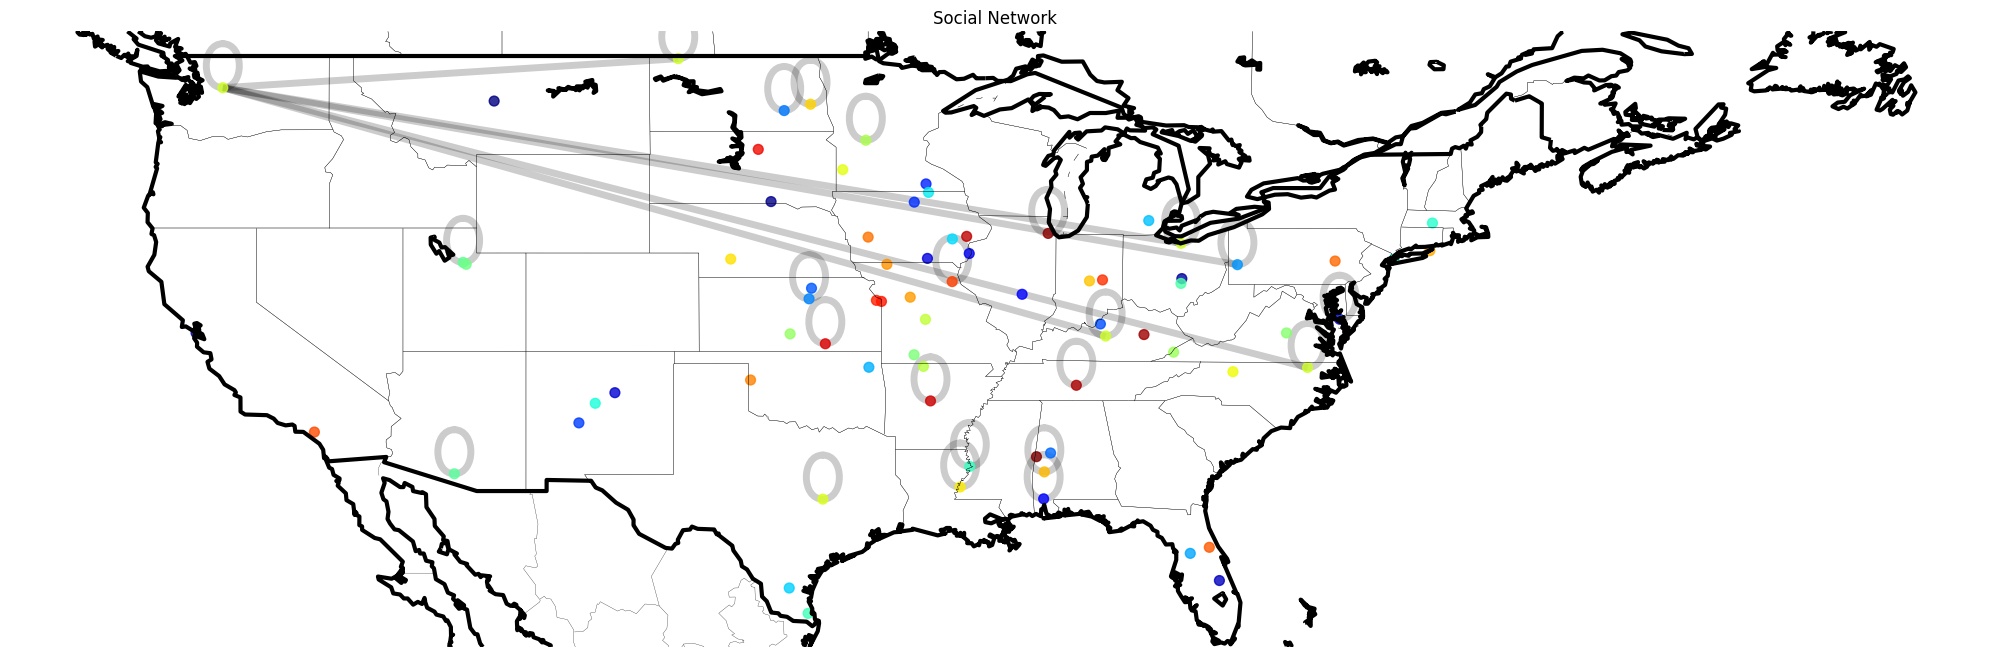

In [ ]:
############################  Communty Detection  ######################
import community #requires separate install -  pip install python-louvain
from community import community_louvain
import warnings

plt.figure(figsize=(20,9))
#pos = nx.spring_layout(Gc,iterations=50,k=2)
partition = community_louvain.best_partition(G)
values = [partition.get(node) for node in G.nodes()]


#####################################################################


plt.axis("off")
plt.title('Social Network'.format(len(set(partition.values()))))
#nx.draw_networkx(Gc, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 1, with_labels = False)


nx.draw_networkx_nodes(G , pos = pos, cmap = plt.get_cmap("jet"), node_color = values, alpha = 0.8, node_size=50) #node_size = 4)
nx.draw_networkx_edges(G , pos = pos, edge_color='k',alpha=0.2, arrows = False,width=5)


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
plt.show()

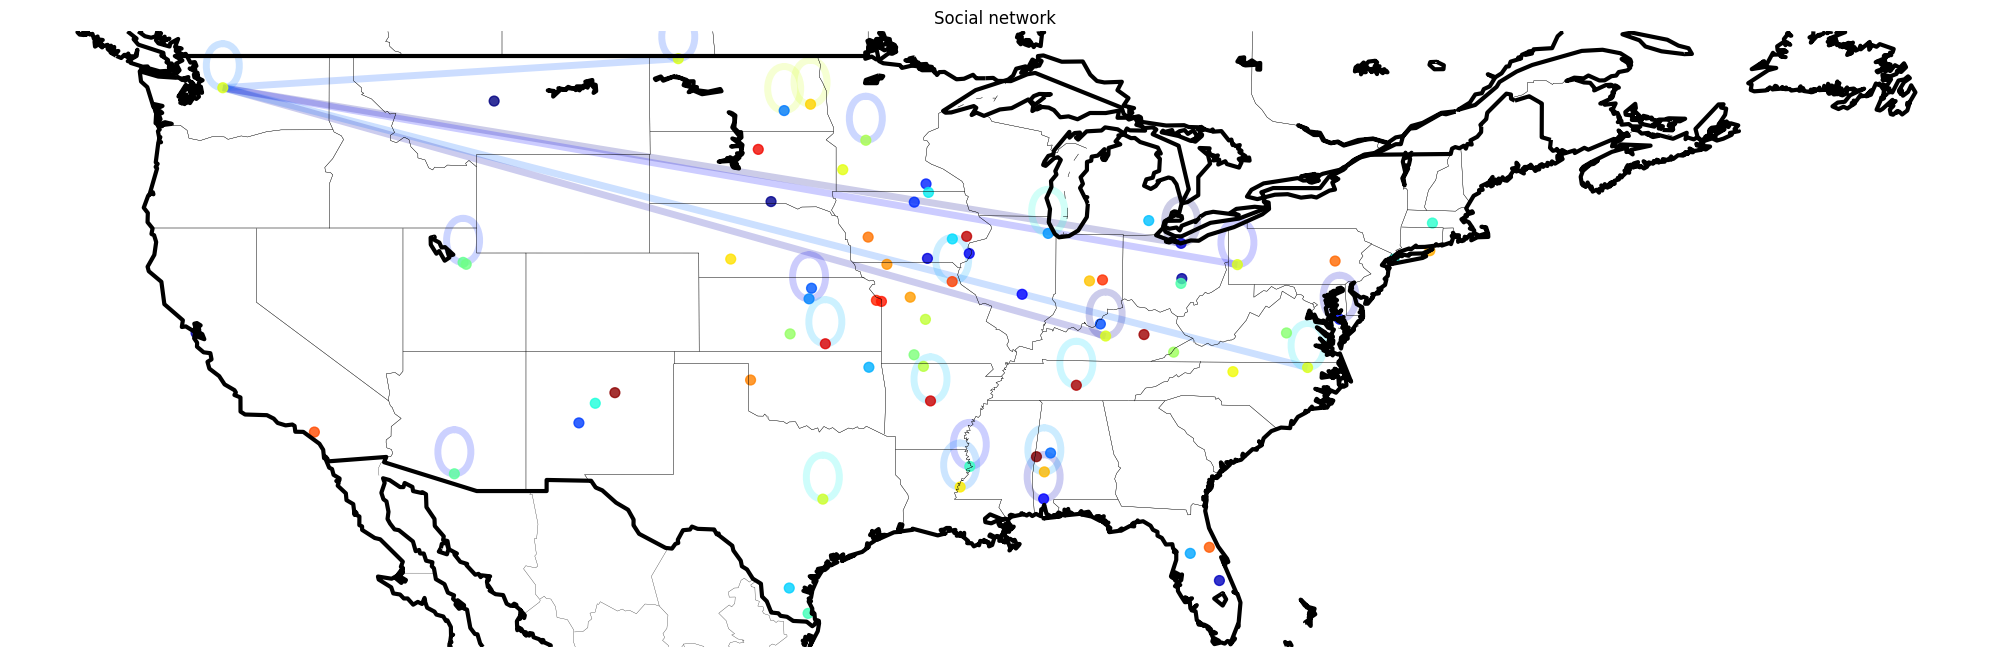

In [ ]:
import matplotlib.cm as cm

plt.figure(figsize=(20, 9))
partition = community_louvain.best_partition(G)
values = [partition.get(node) for node in G.nodes()]

plt.axis("off")
plt.title('Social network'.format(len(set(partition.values()))))

nx.draw_networkx_nodes(G, pos=pos, cmap=plt.get_cmap("jet"), node_color=values, alpha=0.8, node_size=50)

# Convert integers to colors using a colormap
colors = [cm.jet(value / len(set(partition.values()))) for value in values]

nx.draw_networkx_edges(G, pos=pos, edge_color=colors, alpha=0.2, arrows=False, width=5)

m.drawcountries(linewidth=3)
m.drawstates(linewidth=0.2)
m.drawcoastlines(linewidth=3)

plt.tight_layout()
plt.show()

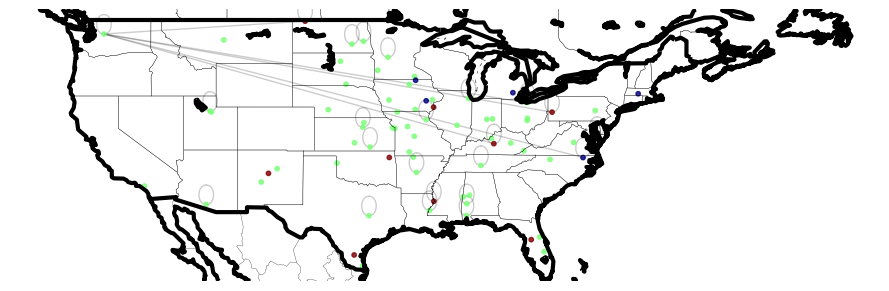

In [ ]:
L = nx.laplacian_matrix(G)
eig_values, eig_vectors = np.linalg.eigh(L.todense()) # Eigen values sorted from smallest to biggest
f = eig_vectors[:,1] # use the second smallest Eigen vector for spectral clustering
labels = np.ravel(np.sign(f)) # decides the label of each node


#####################################################################

fig = plt.figure(figsize=(9,6))
plt.axis("off")
#nx.draw_networkx(Gc, pos,node_size=45, cmap = plt.get_cmap("jet"), node_color=labels, with_labels = False)
nx.draw_networkx_nodes(G , pos = pos, cmap = plt.get_cmap("jet"), node_color = labels, alpha = 0.8, node_size=10) #node_size = 4)
nx.draw_networkx_edges(G , pos = pos, edge_color='k',alpha=0.2, arrows = False)


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
plt.show()


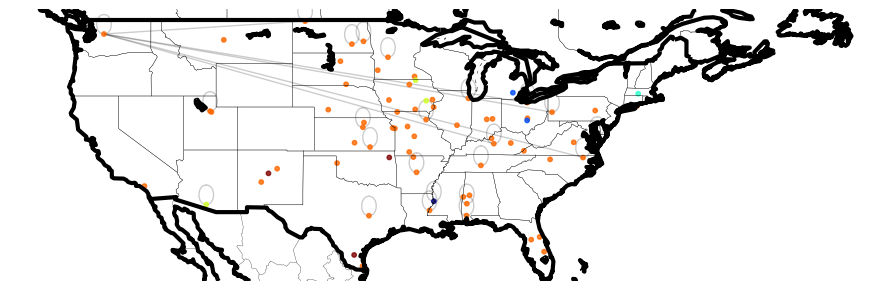

In [ ]:
import scipy.cluster.vq as vq
k=6
means, labels = vq.kmeans2(eig_vectors[:,1:k], k)



#####################################################################

fig = plt.figure(figsize=(9,6))
plt.axis("off")
#nx.draw_networkx(Gc, pos, node_size=45, cmap = plt.get_cmap("jet"), node_color=labels, with_labels = False)

nx.draw_networkx_nodes(G , pos = pos, cmap = plt.get_cmap("jet"), node_color = labels, alpha = 0.8, node_size=10) #node_size = 4)
nx.draw_networkx_edges(G , pos = pos, edge_color='k',alpha=0.2, arrows = False)


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
plt.show()

In [ ]:
!pip install locationtagger
import nltk
import spacy
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')
!python -m spacy download en_core_web_sm
import locationtagger

sample_text="India has very rich and vivid culture widely\
        spread from Kerala to Nagaland to Haryana to Maharashtra. " \
       "Mumbai being financial capital can be said better\
       than some western cities such as " \
       " Lahore, Canberra etc. Pakistan and Nepal share its borders"
#sample_text = 'AGILE SCIENCES, INC.'
place_entity = locationtagger.find_locations(text = sample_text)
 print("The countries in text : ",place_entity.countries)
print("The states in text : ",place_entity.regions)
print("The cities in text : ",place_entity.cities)
print("The countries regions in text : ",place_entity.country_regions)
print("The countries cities in text : ",place_entity.country_cities)
print("All other countries in text : ",place_entity.other_countries)
print("The region cities in text : ",place_entity.region_cities)
print("All other regions in text : ",place_entity.other_regions)
print("All other entities in text : ",place_entity.other)

https://nominatim.org/

In [ ]:
import certifi
import ssl
import geopy.geocoders
import requests
import urllib.parse
university = 'harvard'
url = 'https://nominatim.openstreetmap.org/search.php?q=' + urllib.parse.quote(university) + '&format=jsonv2'
print(url)
response = requests.get(url).json()
print(response[0]['lat'])
print(response[0]['lon'])

https://nominatim.openstreetmap.org/search.php?q=harvard&format=jsonv2


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import certifi
import ssl
import geopy.geocoders
from geopy.geocoders import Nominatim
ctx = ssl.create_default_context(cafile=certifi.where())
geopy.geocoders.options.default_ssl_context = ctx
geolocator = geopy.geocoders.Nominatim(user_agent="geoapiExercises")
location = geolocator.geocode("Lozari beach corse")
print(location)

# Clustring method 2

In [ ]:
display(ClinicalTrial.columns)
display(Grant.columns)
display(Pubmed.columns)

Index(['i.OfficialName', 'i.OfficialAffiliation', 'c. BriefTitle',
       'c.OfficialTitle', 'c.BriefSummary', 'c.NCTId', 'l.LocationCity',
       'l.LocationCountry', 'l.LocationFacility', 'concatenatedInterventions'],
      dtype='object')

Index(['pi.pi_name', 'pi.org_name', 'p.title', 'p.application_id',
       'p.abstract', 'p.terms', 'co.core_project_num'],
      dtype='object')

Index(['a.fullName', 'ar.title', 'ar.affiliation', 'ar.pubmed_id',
       'ar.abstractText', 'concatenatedKeywords', 'concatenatedMeshterms'],
      dtype='object')

In [ ]:
ClinicalTrial['c.BriefSummary']=ClinicalTrial['c.OfficialTitle']+ClinicalTrial['concatenatedInterventions']+ClinicalTrial['c.BriefSummary']
Grant['c.BriefSummary']=Grant['p.title']+Grant['p.terms']+Grant['p.abstract']
Pubmed['ar.abstractText']=Pubmed['ar.title']+Pubmed['concatenatedKeywords']+Pubmed['concatenatedMeshterms']+Pubmed['ar.abstractText']

df1=ClinicalTrial[['i.OfficialName',  'c.BriefSummary', 'i.OfficialAffiliation']]
df2=Grant[['pi.pi_name', 'p.abstract', 'pi.org_name']]
df3=Pubmed[['a.fullName',  'ar.abstractText', 'ar.affiliation']]
# Rename columns to avoid conflicts
df1.columns = ['PI','Abstract', 'Location']
df2.columns = ['PI','Abstract', 'Location']
df3.columns = ['PI','Abstract', 'Location']
#df2['Location']=  df2['locationCity'] +' , '+df2['Location']
result_df = pd.concat([df1, df2, df3])
#result_df = pd.concat([df1,  df3])
result_df=result_df.drop_duplicates()

In [ ]:
result_df

PI                                           Abstract  \
0        Dearbhla Hull  A Double-blind, Placebo-controlled, Multi-cent...   
83        Anthony Bier  A Prospective, Randomized, Double-blinded, Pla...   
84       Mina Pastagia  A Phase 2, Multi-Center, Double-Blind, Randomi...   
91     Mary C. Drinane  Relationship Between the Development of Impair...   
92       Nicolas Roche  Development of a New Tool for Dyspnea Measurem...   
...                ...                                                ...   
33702        Ferrara S  Emerging In Vitro Models for the Study of Infe...   
33703       Brignoli T  Emerging In Vitro Models for the Study of Infe...   
33704         Baysse C  Pseudomonas aeruginosa Soluble Pyocins as Anti...   
33705      Dingemans J  Pseudomonas aeruginosa Soluble Pyocins as Anti...   
33706       Cornelis P  Pseudomonas aeruginosa Soluble Pyocins as Anti...   

                                                Location  
0                                             Zambon SpA  
83     Nutrasource Pharmaceutical and Nutraceutical S...  
84                          Armata Pharmaceuticals, Inc.  
91                    Dartmouth-Hitchcock Medical Center  
92                                  APHP- Hopital Cochin  
...                                                  ...  
33702  Department of Biosciences, Università degli St...  
33703  Department of Biosciences, Università degli St...  
33704  Vrije Universiteit Brussel, Microbiology Group...  
33705  Vrije Universiteit Brussel, Microbiology Group...  
33706  Vrije Universiteit Brussel, Microbiology Group...  

[40213 rows x 3 columns]

In [ ]:
concatenated_data

Node  Community  \
0                 (Nicolas Roche, APHP- Hopital Cochin)          0   
1     (Thierry Perez, CHRU de Lille / Hôpital Calmet...          0   
2     (Remi Rabasa-Lhoret, Institut de Recherches Cl...          1   
3     (Yves Berthiaume, Institut de Recherches Clini...          1   
4         (Melissa S Putman, Boston Childrens Hospital)          2   
...                                                 ...        ...   
2282  (Gheerbrant H, Pôle thorax et vaisseaux, clini...         54   
2283  (Claustre J, Pôle thorax et vaisseaux, cliniqu...         54   
2284  (Okada Y, Department of Physiology and Systems...         55   
2285  (Numata T, Department of Physiology and System...         55   
2286  (Sato-Numata K, Department of Physiology and S...         55   

                      PI                                           Abstract  \
0          Nicolas Roche  Development of a New Tool for Dyspnea Measurem...   
1          Thierry Perez  Development of a New Tool for Dyspnea Measurem...   
2     Remi Rabasa-Lhoret  Effects of a Program of Aerobic and Resistance...   
3        Yves Berthiaume  Effects of a Program of Aerobic and Resistance...   
4       Melissa S Putman  The Effects of a Low Glycemic Load Diet on Dys...   
...                  ...                                                ...   
2282        Gheerbrant H  [Selection of lung transplant candidates in Fr...   
2283          Claustre J  [Selection of lung transplant candidates in Fr...   
2284             Okada Y  Roles of volume-regulatory anion channels, VSO...   
2285            Numata T  Roles of volume-regulatory anion channels, VSO...   
2286       Sato-Numata K  Roles of volume-regulatory anion channels, VSO...   

                                               Location  
0                                  APHP- Hopital Cochin  
1             CHRU de Lille / Hôpital Calmette - France  
2          Institut de Recherches Cliniques de Montreal  
3          Institut de Recherches Cliniques de Montreal  
4                             Boston Childrens Hospital  
...                                                 ...  
2282  Pôle thorax et vaisseaux, clinique universitai...  
2283  Pôle thorax et vaisseaux, clinique universitai...  
2284  Department of Physiology and Systems Bioscienc...  
2285  Department of Physiology and Systems Bioscienc...  
2286  Department of Physiology and Systems Bioscienc...  

[2287 rows x 5 columns]

In [ ]:
result_df=result_df[:1000]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'abstract' is the column containing abstracts
abstracts = result_df['Abstract'].astype(str)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(abstracts)

# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(tfidf_matrix)

# Add a new column with the cluster label for each abstract
result_df['Cluster_DBscan'] = clusters
# Number of clusters
num_clusters = len(np.unique(clusters))
print("Number of clusters:", num_clusters)
# Display the DataFrame with the new 'Cluster' column
print(result_df)

Number of clusters: 16
                               PI  \
0                   Dearbhla Hull   
83                   Anthony Bier   
84                  Mina Pastagia   
91                Mary C. Drinane   
92                  Nicolas Roche   
...                           ...   
8237      Stephanie Van Biervliet   
8238              Isabelle Durieu   
8239     Catherine Obrien, Pharmd   
8240  Christine Rousset Jablonski   
8241           Ian M Balfour Lynn   

                                               Abstract  \
0     A Double-blind, Placebo-controlled, Multi-cent...   
83    A Prospective, Randomized, Double-blinded, Pla...   
84    A Phase 2, Multi-Center, Double-Blind, Randomi...   
91    Relationship Between the Development of Impair...   
92    Development of a New Tool for Dyspnea Measurem...   
...                                                 ...   
8237  Can Quantitative Ultrasound be Used for the Ev...   
8238  Long Term Effects of Azithromycin in Patients ...   
8

In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]

In [ ]:
from top2vec import Top2Vec

# Assuming 'abstract' is the column containing abstracts
abstracts = result_df['Abstract'].astype(str).tolist()
# Initialize Top2Vec model
top2vec_model = Top2Vec(documents=abstracts, speed="fast-learn", workers=4)  #embedding_model='universal-sentence-encoder'
# Get document embeddings
document_vectors = top2vec_model.documents
num_topics = top2vec_model.get_num_topics()
topics = top2vec_model.get_topics()
#top2vec_model.topic_words
#top2vec_model.generate_topic_wordcloud(0)


2024-02-13 23:53:33,631 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-13 23:53:34,068 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-02-13 23:53:36,420 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-02-13 23:54:24,245 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-02-13 23:54:36,640 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-02-13 23:54:36,709 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


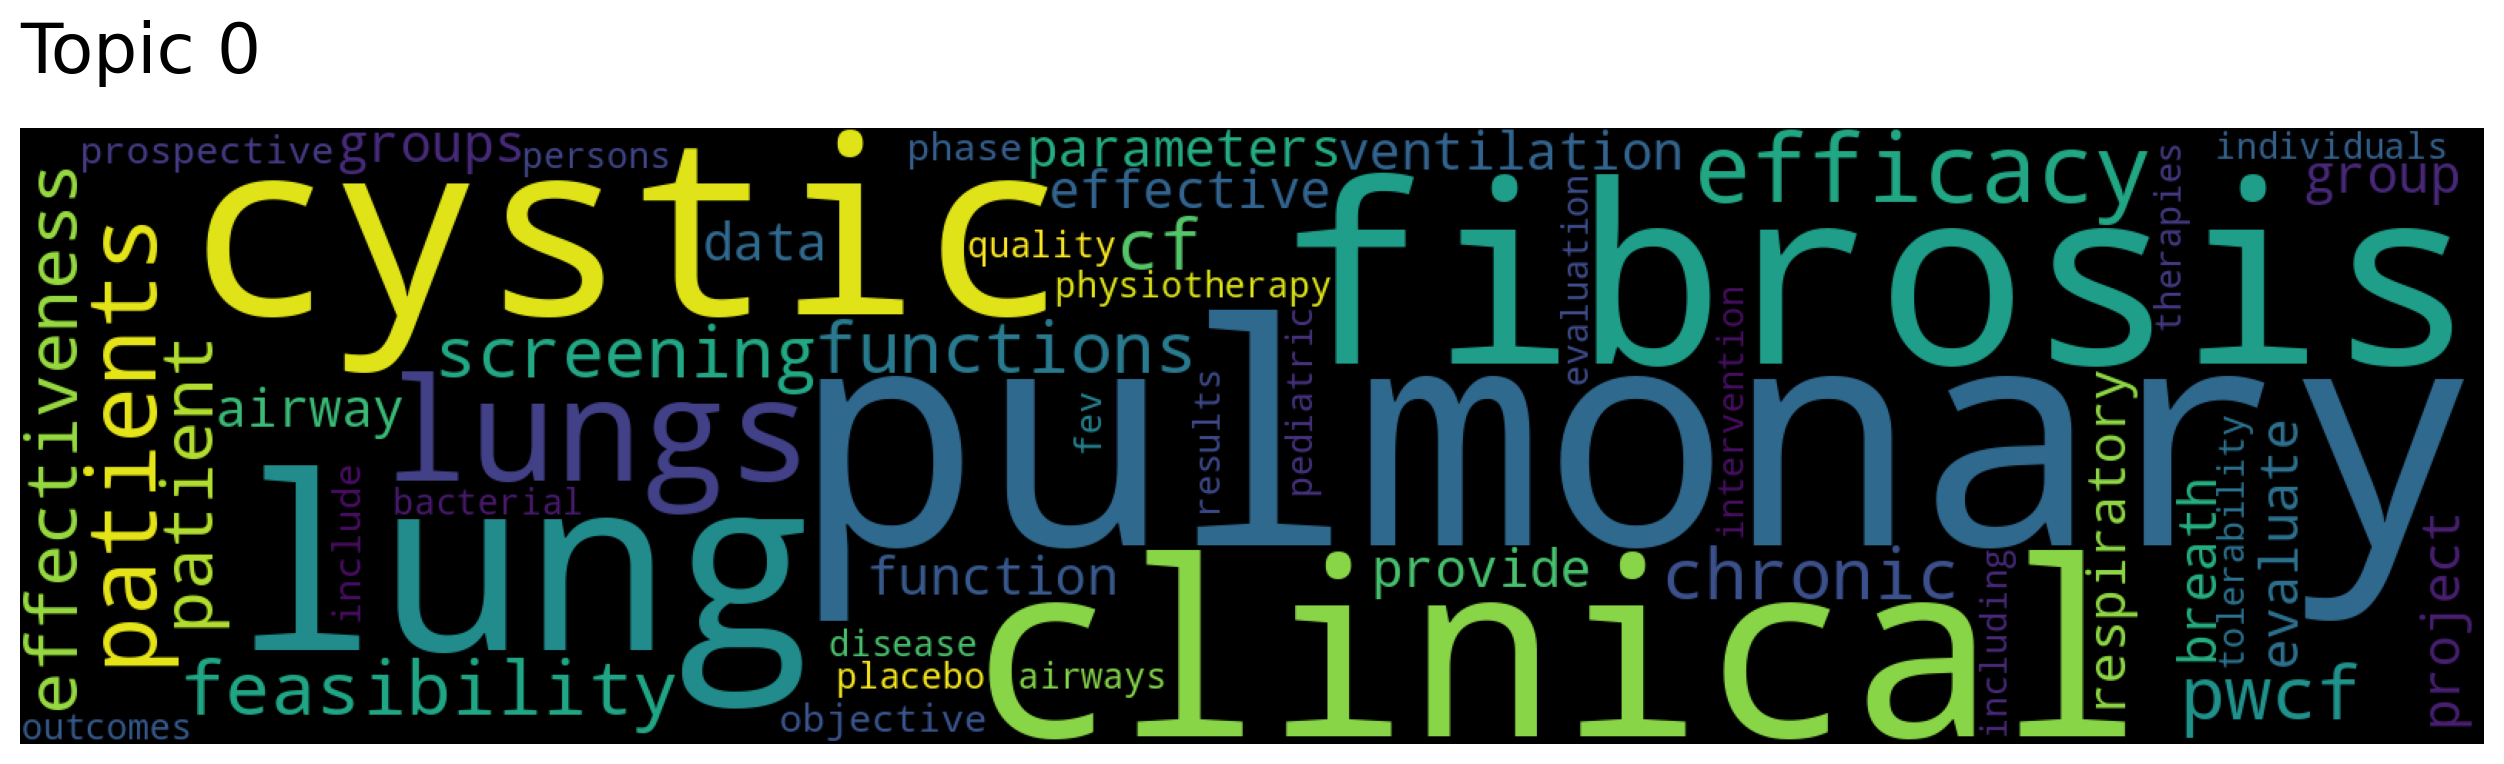

In [ ]:
top2vec_model.generate_topic_wordcloud(0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Assuming 'abstract' is the column containing abstracts
abstracts = result_df['Abstract'].astype(str)
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(abstracts)
# Topic Modeling using Latent Dirichlet Allocation (LDA)
num_topics = 10  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda_model.fit_transform(tfidf_matrix)
# Add a new column with the related topic for each abstract
result_df['Topic'] = topic_matrix.argmax(axis=1)
# Display the DataFrame with the new 'Topic' column
result_df[550:587]

<ipython-input-227-a090a2d920b1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Topic'] = topic_matrix.argmax(axis=1)


PI  \
4332              Eckhard Schoenau, Prof   
4333                  Andres Floto, Mrcp   
4334                         Eitan Kerem   
4335          Karolinne Monteiro, Master   
4336                     Mark Montgomery   
4339                         Shawn Aaron   
4341                   Nestor A. Molfino   
4352                        Carlos Milla   
4363                     Bonnie S Slovis   
4364                      Adelaida Lamas   
4365                       Zafer Soultan   
4366                 Bruno Ravoninjatovo   
4367                       Carla Colombo   
4374                        Jerry A Nick   
4375                      Temitayo Ajayi   
4413                    Bruce Montgomery   
4478                         Merve Fırat   
4479                      Ebru Damadoğlu   
4480                    Aydan Aslı Aksel   
4481                 Naciye Vardar Yağlı   
4482            Novartis Pharmaceuticals   
4505                     Gerhard J Leitz   
4553                 Marijke J Proesmans   
4554                       John P Clancy   
4559            Elliott Dasenbrook, M.D.   
4597            Anton Peleg, Mbbs, Fracp   
4598                     Michael Stalvey   
4599                   Raphaël Rc Chiron   
4600                         Karen Mccoy   
4656         Amin R Javer, Md Frcsc Fars   
4657                        Gilles Rault   
4668                       Meghana Sathe   
4694                    Baharak Moshiree   
4720                      A. Jay Freeman   
4746                     Scott W. Powers   
4751  Silke Van Koningsbruggen-Rietschel   
4759                Stuart Roberts, Mbbs   

                                                  Title  \
4332  Cystic Fibrosis: Improvement of Muscle Force a...   
4333  A Home-based, Rapid and Quantitative Test for ...   
4334  Single-site, Open-label, Dose-ranging, Efficac...   
4335  Effects of Aerobic Interval Training on Glucos...   
4336  A Phase IIa Open Label Study to Evaluate the S...   
4339  Treatment of Aspergillus Fumigatus in Patients...   
4341  A Phase I/II Randomized, Double-Blind, Placebo...   
4352  A Phase I/II Randomized, Double-Blind, Placebo...   
4363  Phase 1 Study of Hydroxychloroquine in Cystic ...   
4364  Phase 4 Study of the Efficacy of Long-term Tre...   
4365  The Carrier Rates of Pseudomonas Aeruginosa in...   
4366  Study of Blood Monocytes as a Predictive Marke...   
4367     COVID-19 Antibody Responses In Cystic Fibrosis   
4374  CF Leukocyte Genes as Biomarkers for Novel The...   
4375  A Phase 3 Efficacy and Safety Study of PTC124 ...   
4413  A Phase 3, Open-label, Follow-On Study of Mult...   
4478  Comparison of Physical Activity, Exercise Capa...   
4479  Comparison of Physical Activity, Exercise Capa...   
4480  Comparison of Physical Activity, Exercise Capa...   
4481  Comparison of Physical Activity, Exercise Capa...   
4482  A Randomized, Double Blind Placebo-controlled ...   
4505  A Point Prevalence Study to Evaluate the Preva...   
4553  Prospective Randomized Trial Comparing Oral Ci...   
4554  A Phase 2 Study of PTC124 as an Oral Treatment...   
4559  A Phase 2, Randomized, Double Blind, Placebo-c...   
4597  Continuous-infusion Anti-pseudomonal β-lactams...   
4598  Growth Hormone Therapy for Wasting in Cystic F...   
4599  Bacteriophages Effects on Pseudomonas Aerugino...   
4600  A Phase 3, Double-Blind, Multicenter, Randomiz...   
4656                                                nan   
4657  A Phase II, Dose Ranging, Multicenter, Double-...   
4668  Multicenter Study of Patient-reported Gastroin...   
4694  Multicenter Study of Patient-reported Gastroin...   
4720  Multicenter Study of Patient-reported Gastroin...   
4746  A Multi-Site Randomized Clinical Trial of Beha...   
4751  Corona-Virus-Disease 2019 (Covid-19) Antibody ...   
4759  The Prevalence and Significance of Gastro-oeso...   

                                               Abstract  \
4332  The purpose of this study is to evaluate the e...   
4333

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

def name_clusters(df, text_column, cluster_column, num_clusters=5):
    # Extract abstracts from the specified column
    abstracts = df[text_column].tolist()

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(abstracts)

    # KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)

    # Assign cluster labels to the DataFrame
    df[cluster_column] = clusters

    # Extract most important words for each cluster
    terms = vectorizer.get_feature_names_out()
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

    cluster_names = {}
    for i in range(num_clusters):
        important_words = [terms[ind] for ind in order_centroids[i, :5]]  # Extract top 5 words per cluster
        cluster_names[i] = ' '.join(important_words)

    # Rename the columns based on cluster names
    column_names = {i: f'Topic_{i}_{cluster_names[i]}' for i in range(num_clusters)}
    df.rename(columns=column_names, inplace=True)

    return df
df=result_df
name_clusters(df, 'Abstract', 'cluster', num_clusters=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-226-f2cd3826a201>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cluster_column] = clusters
<ipython-input-226-f2cd3826a201>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_names, inplace=True)


PI  \
0               Dearbhla Hull   
89               Anthony Bier   
90              Mina Pastagia   
97            Mary C. Drinane   
98              Nicolas Roche   
...                       ...   
7854          Medical Monitor   
7879    Raphael Chiron, Pu-Ph   
7880  Asad Patanwalla, Pharmd   
7881       Hanna Phan, Pharmd   
7882            Eric M Snyder   

                                                  Title  \
0     A Double-blind, Placebo-controlled, Multi-cent...   
89    A Prospective, Randomized, Double-blinded, Pla...   
90    A Phase 2, Multi-Center, Double-Blind, Randomi...   
97    Relationship Between the Development of Impair...   
98    Development of a New Tool for Dyspnea Measurem...   
...                                                 ...   
7854  A Randomized, Double-Blind, Placebo-Controlled...   
7879  Multi-omic Longitudinal Characterization of Pu...   
7880  Modifying Genes in Cystic Fibrosis: The Beta-2...   
7881  Modifying Genes in Cystic Fibrosis: The Beta-2...   
7882  Modifying Genes in Cystic Fibrosis: The Beta-2...   

                                               Abstract  \
0     The primary objective of the trial is to inves...   
89    This study aims to evaluate the impact of a sp...   
90    A phase 2, multi-center, double-blind, randomi...   
97    This study proposes to examine the relationshi...   
98    The purpose of this study is the psychometric ...   
...                                                 ...   
7854  The primary objective of the study was to eval...   
7879  The composition and role of the pulmonary micr...   
7880  Our aims were to determine if exhaled breath c...   
7881  Our aims were to determine if exhaled breath c...   
7882  Our aims were to determine if exhaled breath c...   

                                               Location  Topic  cluster  
0                                            Zambon SpA      2        1  
89    Nutrasource Pharmaceutical and Nutraceutical S...      3        9  
90                         Armata Pharmaceuticals, Inc.      2        1  
97                   Dartmouth-Hitchcock Medical Center      3        9  
98                                 APHP- Hopital Cochin      3        5  
...                                                 ...    ...      ...  
7854                Vertex Pharmaceuticals Incorporated      2        8  
7879                University Hospitals of Montpellier      3        5  
7880  Department of Pharmacy Practice and Science, U...      3        5  
7881  Department of Pharmacy Practice and Science, U...      3        5  
7882  Department of Pharmacy Practice and Science, U...      3        5  

[1000 rows x 6 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


def extract_topics_lda(text, num_topics=2):
    # Tokenize the text
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])

    # Apply LDA
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)

    # Get the most probable topics
    feature_names = vectorizer.get_feature_names_out()
    topics = [', '.join([feature_names[i] for i in topic.argsort()[:-num_topics - 1:-1]]) for topic in lda.components_]

    return topics


def extract_topics_lda_grouped(df):
    # Group by 'Topic' and sum 'Abstract'
    grouped_df = df.groupby('Topic')['Abstract'].sum().reset_index()

    # Initialize an empty list to store the results for each topic
    results = []

    # Apply LDA to each grouped abstract
    for index, row in grouped_df.iterrows():
        topic = row['Topic']
        abstract = row['Abstract']

        # Tokenize and apply LDA
        topics_found = extract_topics_lda(abstract)

        # Append the result to the list
        results.append({'Topic': topic, 'Topics_found': topics_found})

    return results


# Function call
grouped_results = extract_topics_lda_grouped(result_df)

# Display results
for result in grouped_results:
    print(f"Topic {result['Topic']}: {result['Topics_found']}")

Topic 0: ['study, patients', 'study, patients']
Topic 1: ['study, cf', 'study, cf']
Topic 2: ['cf, patients', 'cf, patients']
Topic 3: ['patients, transplantation', 'patients, transplantation']
Topic 4: ['cf, patients', 'cf, patients']
Topic 5: ['cf, study', 'cf, study']
Topic 6: ['study, patients', 'study, patients']
Topic 7: ['cf, cystic', 'cf, cystic']
Topic 8: ['study, fibrosis', 'study, fibrosis']
Topic 9: ['cf, study', 'cf, study']


In [ ]:
from transformers import pipeline
def ask_question(question, context):
    # Load the pretrained question-answering model
    qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")

    # Provide the context and question to the model
    answer = qa_pipeline(question=question, context=context)

    return answer['answer']

# Example usage
context = '''Edson Arantes do Nascimento (Brazilian Portuguese: [ˈɛtsõ aˈɾɐ̃tʃiz du nasiˈmẽtu]; 23 October 1940 – 29 December 2022), better known by his nickname Pelé (Portuguese pronunciation: [peˈlɛ]), was a Brazilian professional footballer who played as a forward. Widely regarded as one of the greatest players of all-time, he was among the most successful and popular sports figures of the 20th century.[2][3] In 1999, he was named Athlete of the Century by the International Olympic Committee and was included in the Time list of the 100 most important people of the 20th century. In 2000, Pelé was voted World Player of the Century by the International Federation of Football History & Statistics (IFFHS) and was one of the two joint winners of the FIFA Player of the Century. His 1,279 goals in 1,363 games, which includes friendlies, is recognised as a Guinness World Record.[4]'''
#question = "what word can describe this text"
question = "what are the main skills?"
ask_question(question, context)


NameError: name 'pipeline' is not defined

https://thenewstack.io/large-language-models-open-source-llms-in-2023/

In [ ]:
from transformers import pipeline
qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")
def ask_question(context):
    # Load the pretrained question-answering model
    # Provide the context and question to the model
    answer = qa_pipeline(question="what are the main skills?", context=context)

    return answer['answer']
def extract_topics_lda_grouped(df):
    # Group by 'Topic' and sum 'Abstract'
    grouped_df = df.groupby('Topic')['Abstract'].sum().reset_index()

    # Initialize an empty list to store the results for each topic
    results = []

    # Apply LDA to each grouped abstract
    for index, row in grouped_df.iterrows():
        topic = row['Topic']
        abstract = row['Abstract']

        # Tokenize and apply LDA
        topics_found = ask_question(abstract)

        # Append the result to the list
        results.append({'Topic': topic, 'Topics_found': topics_found})

    return results
# Function call
grouped_results = extract_topics_lda_grouped(result_df)

# Display results
for result in grouped_results:
    print(f"Topic {result['Topic']}: {result['Topics_found']}")

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trai

Topic 0: Assess the safety and the tolerability of NO intermittent inhalation treatment
Topic 1: feasibility and tolerability
Topic 2: self-care skills (knowledge and skills) and coping skills
Topic 3: Assess gestural know-how
Assess the cognitive know-how
Topic 4: education, as well as nutritional and exercise counselling
Topic 5: physiotherapy and inhalation
Topic 6: CF knowledge and skills
Topic 7: chest physiotherapy (\chest PT\) and cough
Topic 8: patient, catheter, and catheter management
Topic 9: feasibility and discriminative value


<ipython-input-230-da9abf8fb6a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df1['Topic'] = result_df1['Topic'].astype(int)  # Convert 'Topic' to integer for labeling


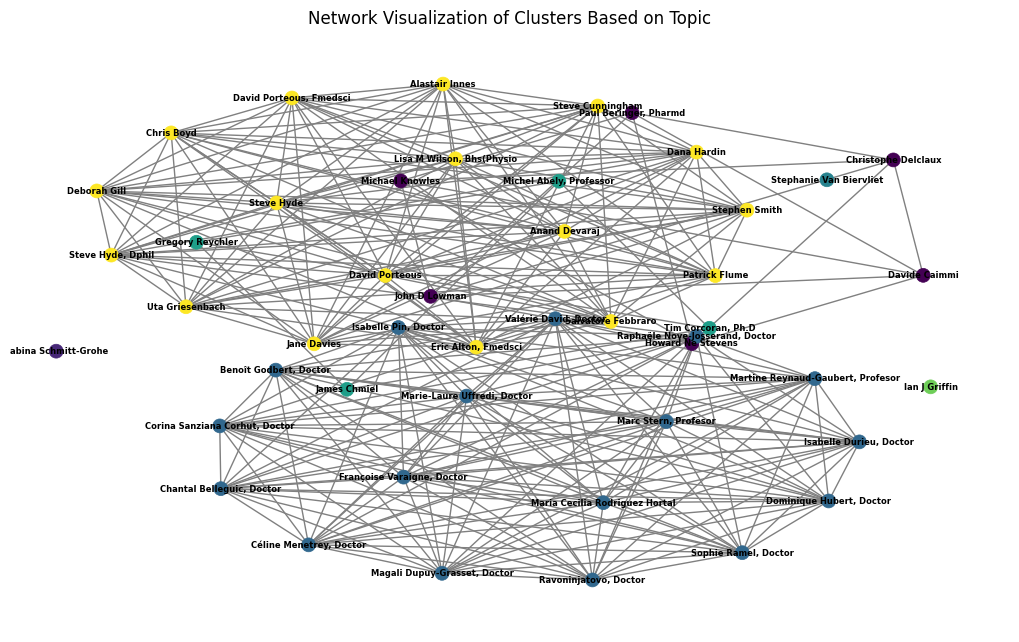

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Assuming 'result_df' is your DataFrame
result_df1 = result_df[650:700]
result_df1['Topic'] = result_df1['Topic'].astype(int)  # Convert 'Topic' to integer for labeling

# Create a graph
G = nx.Graph()

# Add nodes (Principal Investigators) with colors based on 'Topic'
node_colors = {}
for index, row in result_df1.iterrows():
    G.add_node(row['PI'])
    node_colors[row['PI']] = row['Topic']

# Add edges based on 'Topic'
for index, row in result_df1.iterrows():
    neighbors = result_df1[result_df1['Topic'] == row['Topic']]['PI']
    for neighbor in neighbors:
        if neighbor != row['PI']:  # Avoid self-loops
            G.add_edge(row['PI'], neighbor)

# Draw the graph with node colors and increased distance
plt.figure(figsize=(10, 6))
#pos = nx.spring_layout(G, k=1.2)  # Adjust the value of k for increased distance
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_size=6, node_size=100, node_color=[node_colors[node] for node in G.nodes], cmap='viridis', font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)

# Set plot title
plt.title('Network Visualization of Clusters Based on Topic')

# Show the plot
plt.show()

<ipython-input-231-e5a452a5677d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df1['Topic'] = result_df1['Topic'].astype(int)  # Convert 'Topic' to integer for labeling


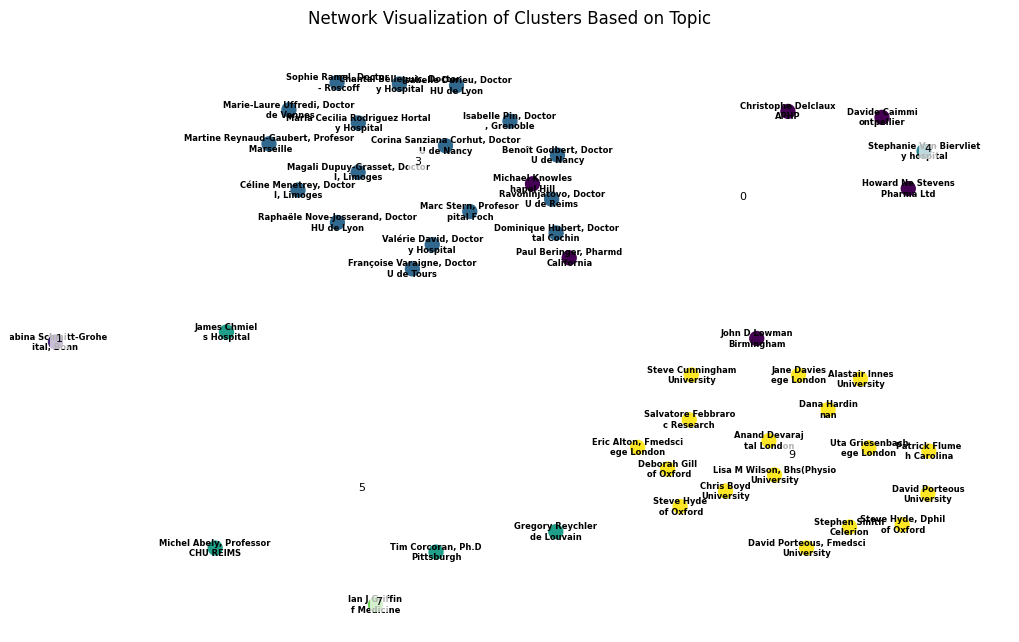

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Assuming 'result_df' is your DataFrame
result_df1 = result_df[650:700]
result_df1['Topic'] = result_df1['Topic'].astype(int)  # Convert 'Topic' to integer for labeling

# Create a graph
G = nx.Graph()

# Add nodes (Principal Investigators) with colors based on 'Topic'
node_labels = {}
node_colors = {}
for index, row in result_df1.iterrows():
    G.add_node(row['PI'])
    node_colors[row['PI']] = row['Topic']
    location_info = row['Location'][-10:]  # Take the last 10 characters of the 'Location'
    node_labels[row['PI']] = f"{row['PI']}\n{location_info}"  # Custom label including 'PI' and 'Location'

# Add edges
for index, row in result_df1.iterrows():
    neighbors = result_df1[result_df1['Topic'] == row['Topic']]['PI']
    for neighbor in neighbors:
        if neighbor != row['PI']:  # Avoid self-loops
            G.add_edge(row['PI'], neighbor)

# Draw the graph with node colors and labels for each cluster
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)  # Adjust the value of k for increased distance
nx.draw(G, pos, with_labels=True, font_size=6, node_size=100,
        node_color=[node_colors[node] for node in G.nodes], cmap='viridis', font_color='black', font_weight='bold',
        edge_color='white', labels=node_labels)  # Set the edge color to white and use custom labels

# Add labels for each cluster
cluster_labels = {label: label for label in set(node_colors.values())}
for color, label in cluster_labels.items():
    cluster_nodes = [node for node, node_color in node_colors.items() if node_color == color]
    cluster_center = (sum(pos[node][0] for node in cluster_nodes) / len(cluster_nodes),
                      sum(pos[node][1] for node in cluster_nodes) / len(cluster_nodes))
    plt.text(cluster_center[0], cluster_center[1], label, fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Set plot title
plt.title('Network Visualization of Clusters Based on Topic')

# Show the plot
plt.show()

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification

def get_important_words(text):
    # Load pretrained model and tokenizer
    model_name = "bert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    # Tokenize input text
    tokens = tokenizer(text, return_tensors="pt")

    # Get model output
    outputs = model(**tokens)

    # Choose relevant layer for embeddings (e.g., logits for BERT token classification)
    logits = outputs.logits

    # Calculate importance scores (e.g., sum of logits)
    importance_scores = logits.sum(dim=1)

    # Get the top 10 important words
    top_words_indices = importance_scores.argsort(descending=True)[:, :10]

    # Decode tokens back to words
    important_words = [tokenizer.decode(indices.tolist(), skip_special_tokens=True) for indices in top_words_indices]

    return important_words

# Example usage
text_to_analyze = '''In natural language processing, the identification of key words within
a text is a crucial task for understanding content and extracting meaningful information.
Leveraging the power of pretrained language models, we have developed a Python function named get_important_words.
 This function utilizes the BERT-based model, specifically bert-base-uncased, and employs the Hugging Face
  Transformers library. By tokenizing the input text and obtaining the model's predictions through
   the logits attribute, the function calculates importance scores for each word.
    The top 10 important words are then extracted based on these scores.
    To demonstrate the functionality, we applied the function to the sample text
     and obtained the important words. This approach allows
    for a quick and effective way to identify key terms within a given text,
    facilitating tasks such as content summarization, keyword extraction, and more.'''
important_words = get_important_words(text_to_analyze)
print("Important words:", important_words)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Important words: ['[unused0]']


In [ ]:
#!pip install transformers
#!pip install accelerate
#TRANSFORM=`python -c "import transformers;print('/'.join(transformers.__file__.split('/')[:-1])+'/models/llama/convert_llama_weights_to_hf.py')"`
!pip install protobuf && python $TRANSFORM --input_dir ./llama-2-7b-chat --model_size 7B --output_dir ./llama-2-7b-chat-hf

unknown option --input_dir
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [ ]:
import torch
import transformers
from transformers import LlamaForCausalLM, LlamaTokenizer

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Answer: forward
